In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [149]:
#from google.colab import files
#uploaded = files.upload()

In [150]:
df = pd.read_excel("marketing_campaign1.xlsx")
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [151]:
df.shape

(2240, 29)

In [152]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [154]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

In [155]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# INFERENCES
The dataset consists of 2240 rows and 29 columns.
By checking the null values, we got that "Income" variable has 24 missing values.

In [156]:
df_new  = df.drop(["Z_CostContact","Z_Revenue"],axis=1)
df_new.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  2012-09-04       58       635  ...                   10                  4   
1  2014-03-08       38        11  ...                    1                  2   
2  2013-08-21       26       426  ...                    2                 10   
3  2014-02-10       26        11  ...                    0                  4   
4  2014-01-19       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [157]:
df_new.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

# Replacing null values

In [158]:
df_new["Income"].fillna(df_new["Income"].mean(),inplace=True)
df_new.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [159]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### DATA VISUALIZATION

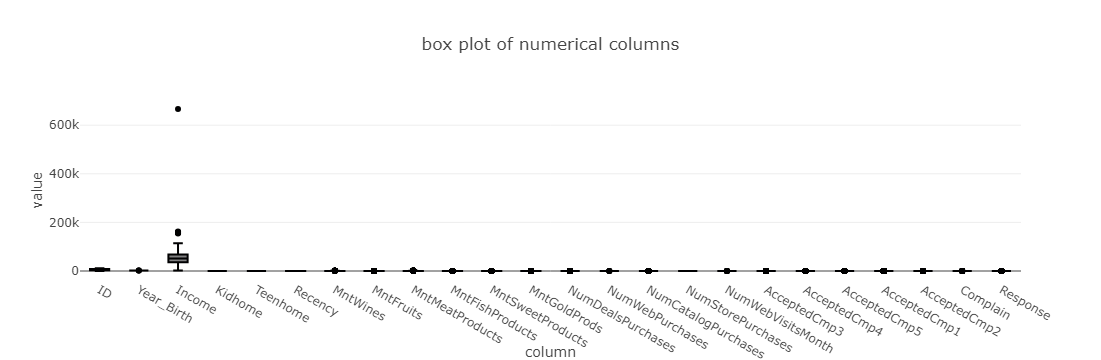

In [160]:
#box plot of all the numerical values
import plotly.express as px
numerical_columns =df_new.select_dtypes(include=['int64','float64']).columns
fig = px.box(df_new,y=numerical_columns,title='box plot of numerical columns')
fig.update_layout(xaxis_title='column',yaxis_title='value',yaxis=dict(type='linear'))
fig.show()

<Axes: >

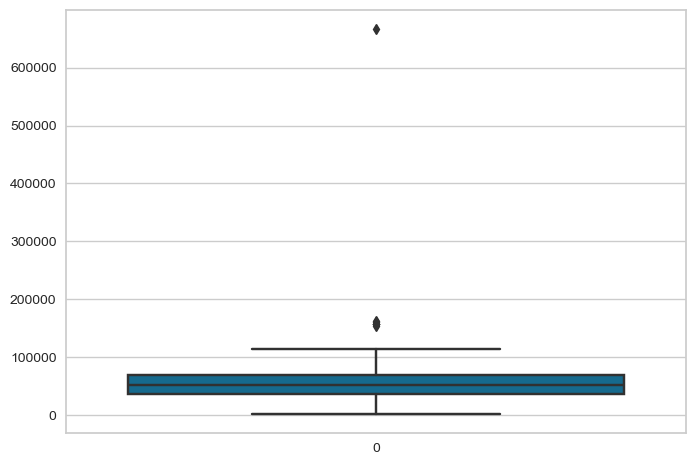

In [161]:
sns.boxplot(df_new["Income"])

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

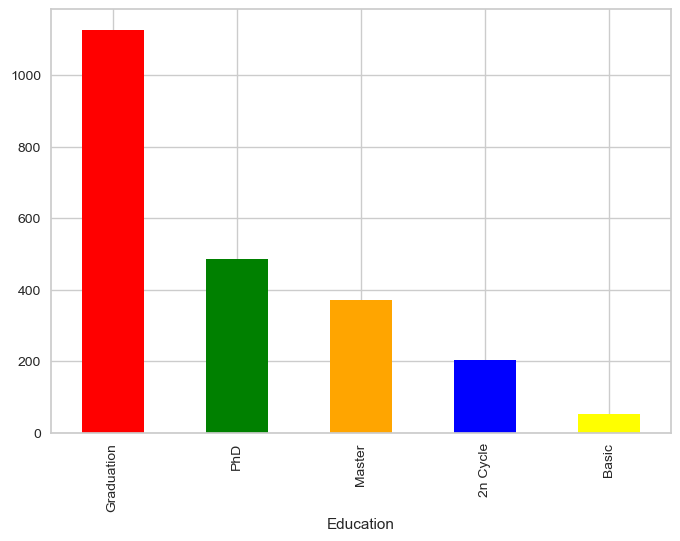

In [162]:
df_new['Education'].value_counts().plot(kind='bar', color =["red", "green","orange","blue","yellow"])
df_new['Education'].value_counts()

From the barplot, we can see that most of the customers are graduates

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

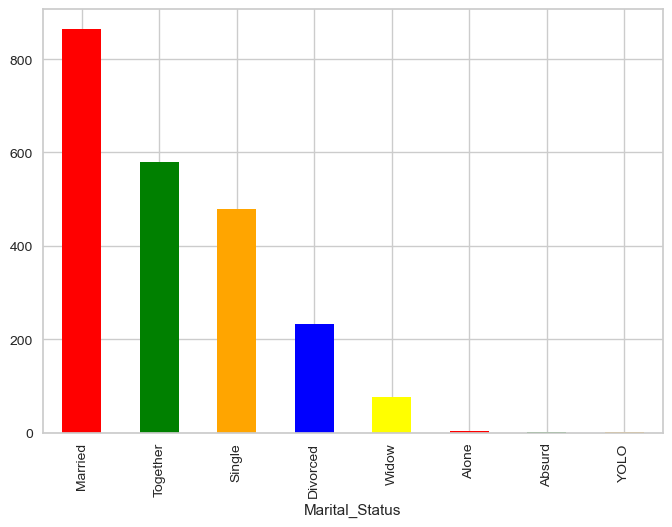

In [163]:
df_new['Marital_Status'].value_counts().plot(kind='bar',color=["red", "green","orange","blue","yellow"])
df_new['Marital_Status'].value_counts()

Over 800 and more customers are married as we see the barplot.

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

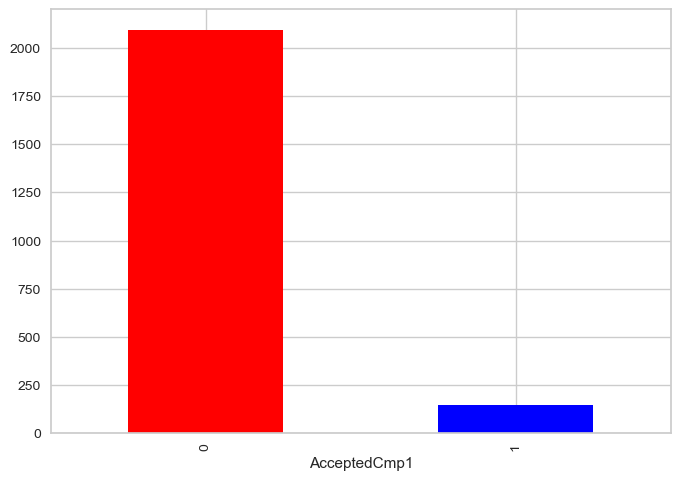

In [164]:
df_new["AcceptedCmp1"].value_counts().plot(kind='bar',color=["red","blue"])
df_new['AcceptedCmp1'].value_counts()

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

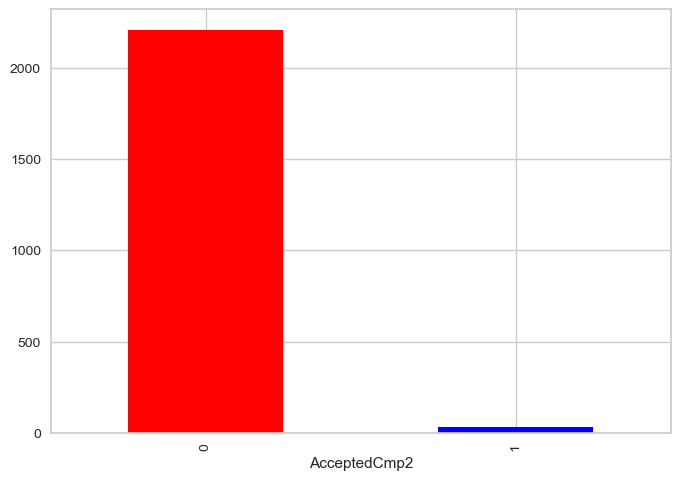

In [165]:
df_new["AcceptedCmp2"].value_counts().plot(kind='bar',color=["red","blue"])
df_new['AcceptedCmp2'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

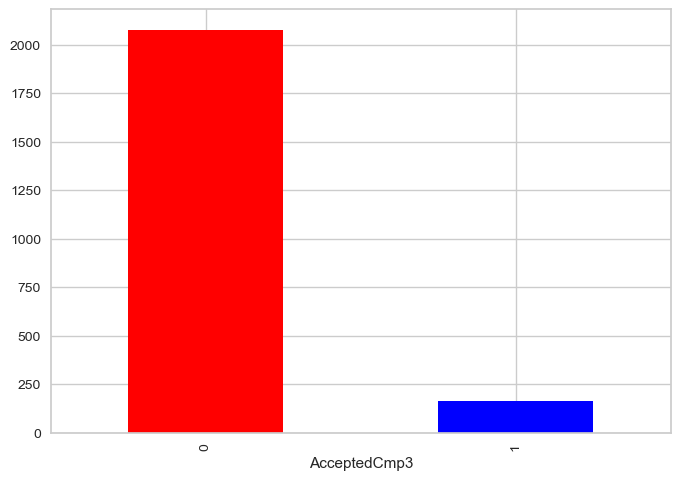

In [166]:
df_new['AcceptedCmp3'].value_counts().plot(kind='bar',color=["red","blue"])
df_new['AcceptedCmp3'].value_counts()

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

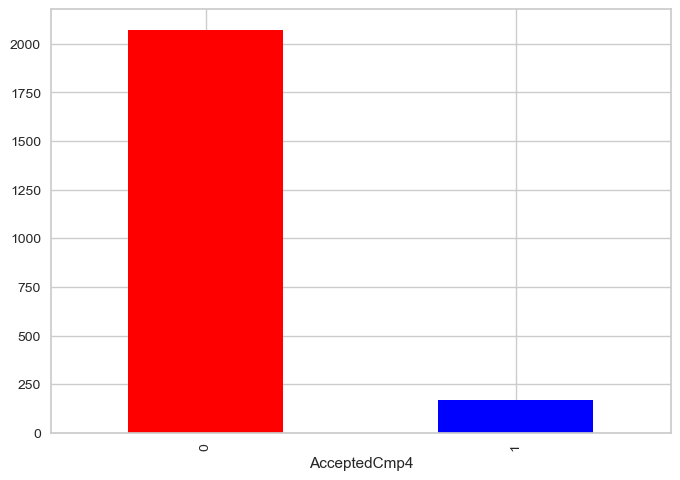

In [167]:
df_new['AcceptedCmp4'].value_counts().plot(kind='bar',color=["red","blue"])
df_new['AcceptedCmp4'].value_counts()

AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

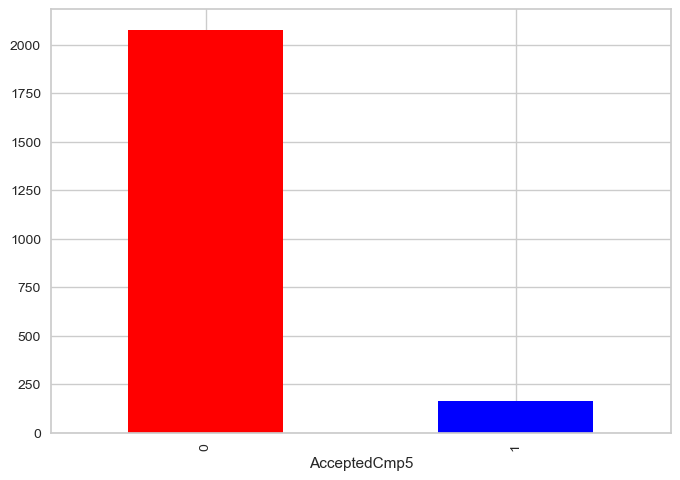

In [168]:
df_new['AcceptedCmp5'].value_counts().plot(kind='bar',color=["red","blue"])
df_new['AcceptedCmp5'].value_counts()

It is clear that the customers accepted the offer in the 1st,3rd,4th and 5th campaigns.

<Axes: ylabel='Kidhome'>

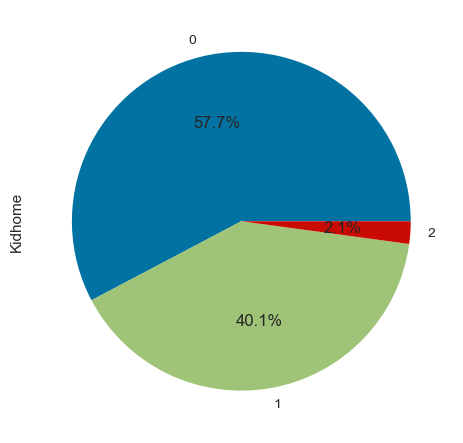

In [169]:
df_new.Kidhome.value_counts().plot(kind='pie',label='Kidhome',autopct="%1.1f%%")

From the pieplot,we can see that most of them doesn't have kids in their home.

<Axes: ylabel='Teenhome'>

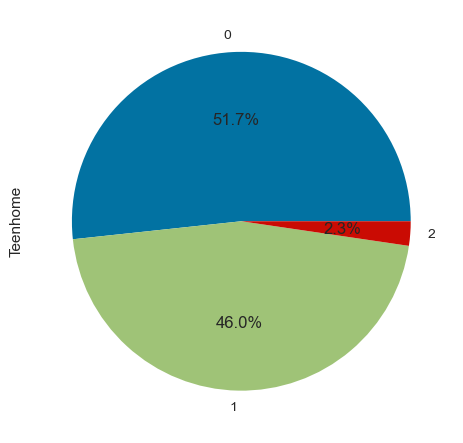

In [170]:
df_new.Teenhome.value_counts().plot(kind='pie',label = "Teenhome",autopct="%1.1f%%")

Most cutomers have atleast one teen in their Home.

<Axes: xlabel='Education', ylabel='Income'>

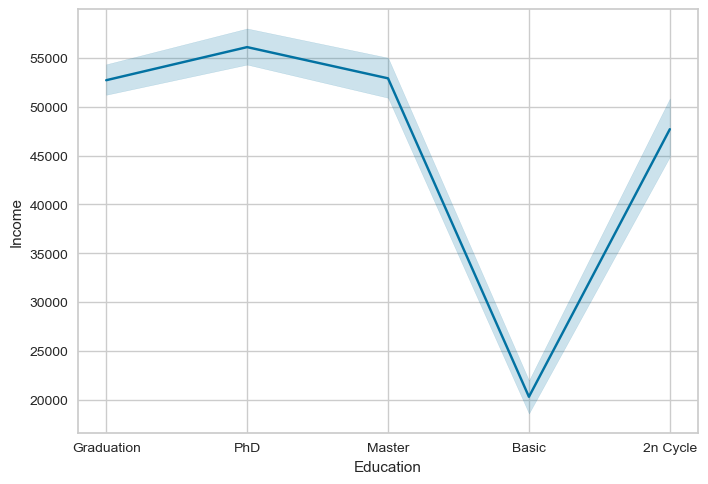

In [171]:
sns.lineplot(x='Education',y='Income',data=df_new)

The customers who studied PhD earns highest income and the customers having Basic educatiom earns the least.

<Axes: xlabel='NumCatalogPurchases', ylabel='Income'>

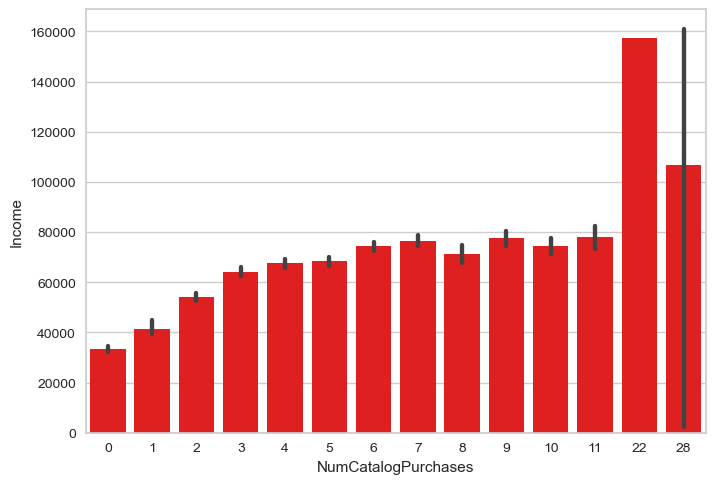

In [172]:
sns.barplot(x='NumCatalogPurchases',y='Income',data=df_new,color="red")


<Axes: xlabel='Education', ylabel='NumCatalogPurchases'>

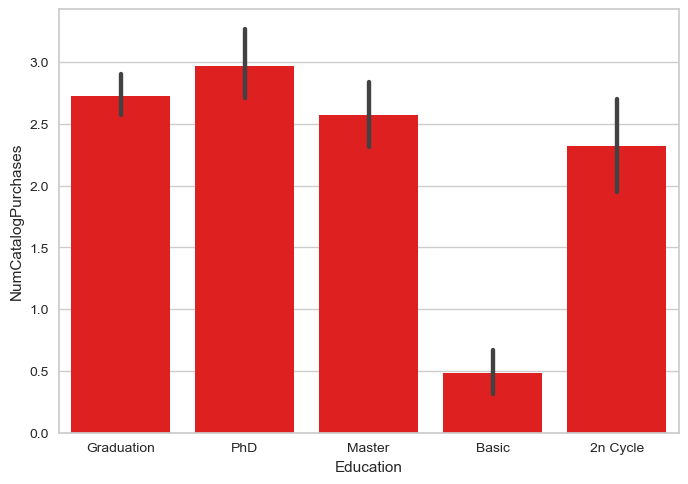

In [173]:
sns.barplot(y='NumCatalogPurchases',x='Education',data=df_new,color="red")

<Axes: xlabel='NumWebPurchases', ylabel='Income'>

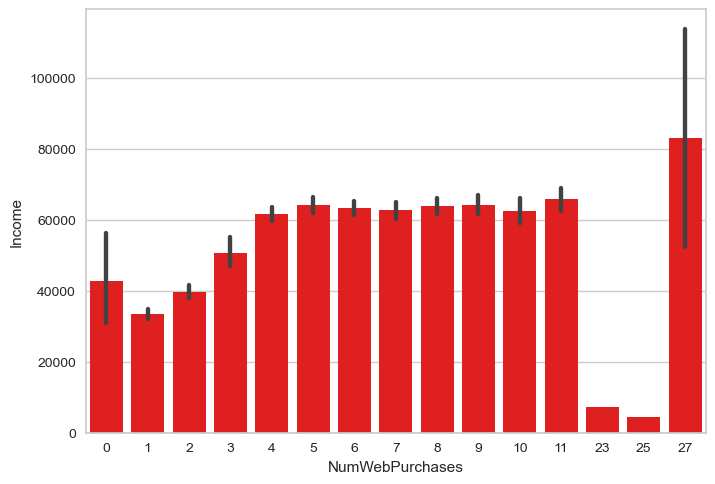

In [174]:
sns.barplot(x='NumWebPurchases',y='Income',data=df_new,color="red")

<Axes: xlabel='Education', ylabel='NumStorePurchases'>

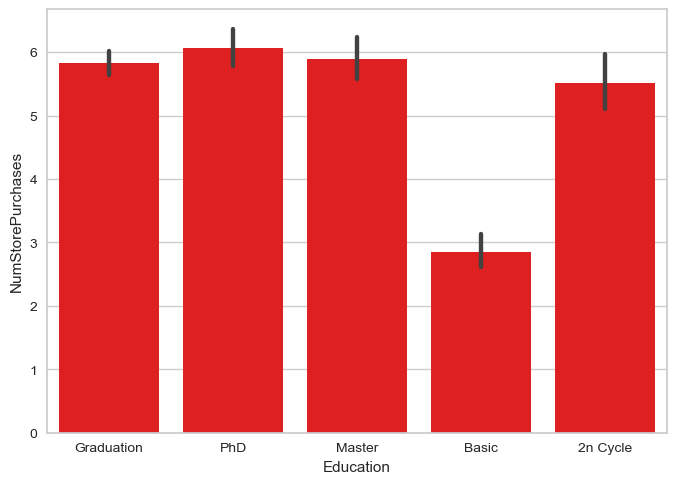

In [175]:
sns.barplot(y='NumStorePurchases',x='Education',data=df_new,color="red")

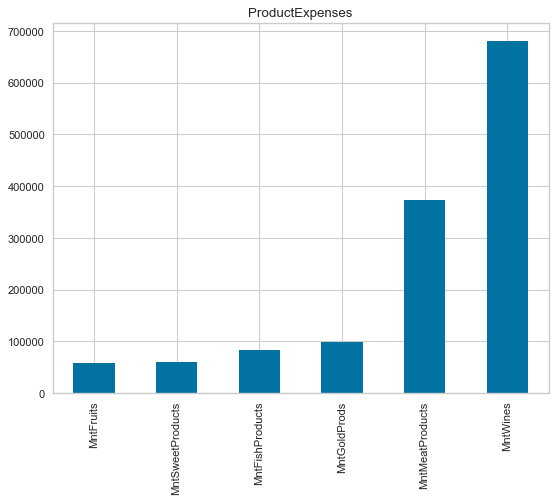

In [176]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='bar')
plt.title('ProductExpenses')
plt.show()

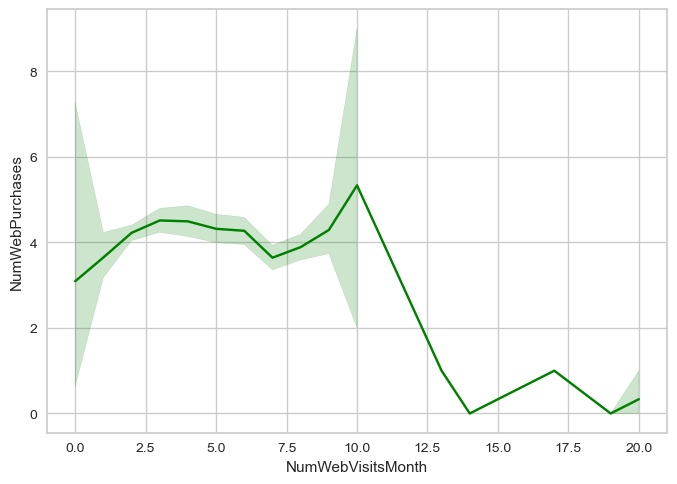

In [177]:
sns.lineplot(x='NumWebVisitsMonth', y='NumWebPurchases',data = df_new, color = "green")
plt.show()

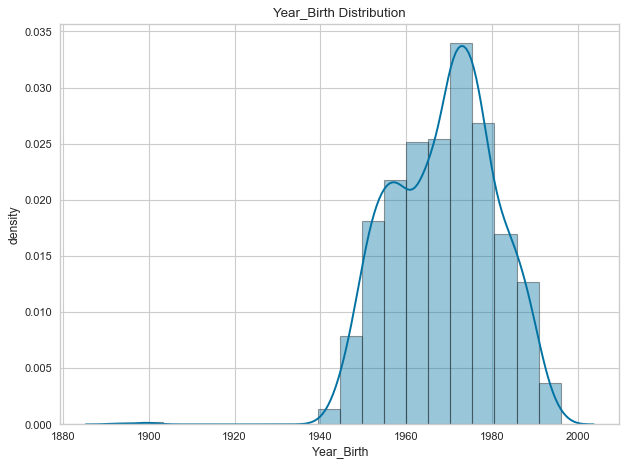

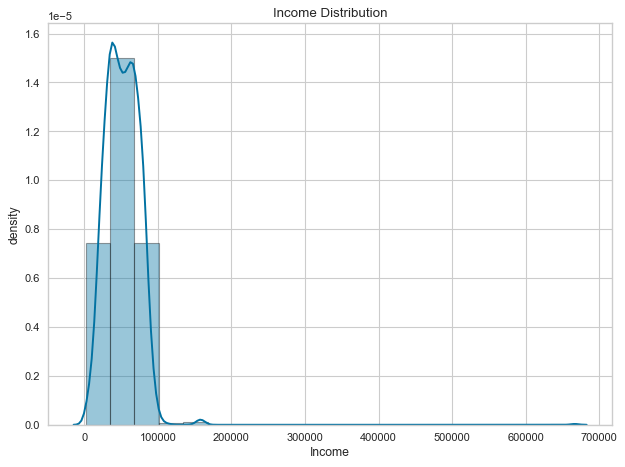

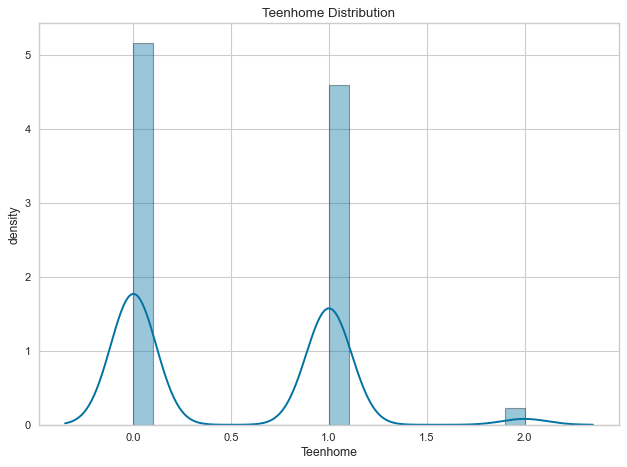

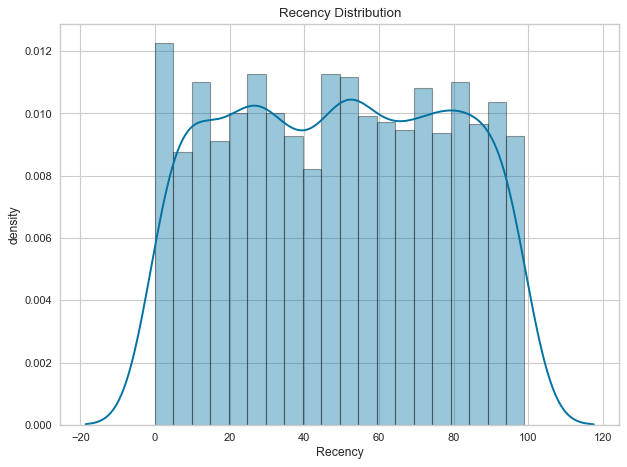

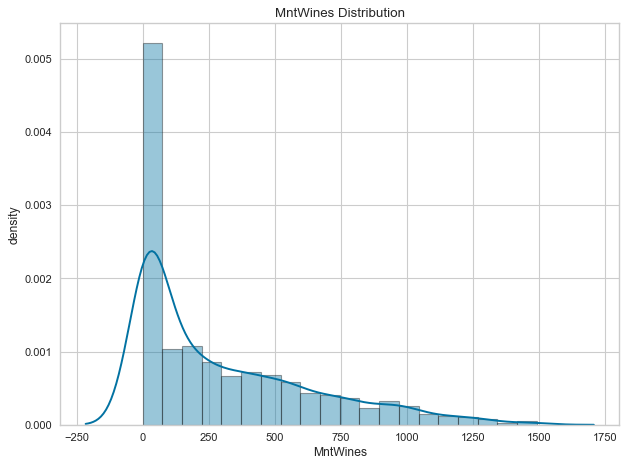

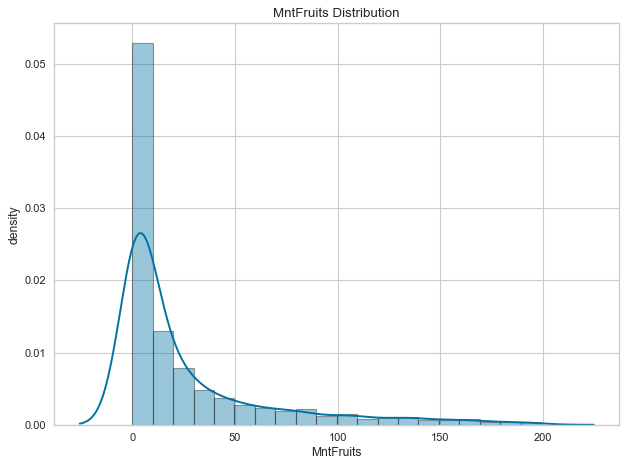

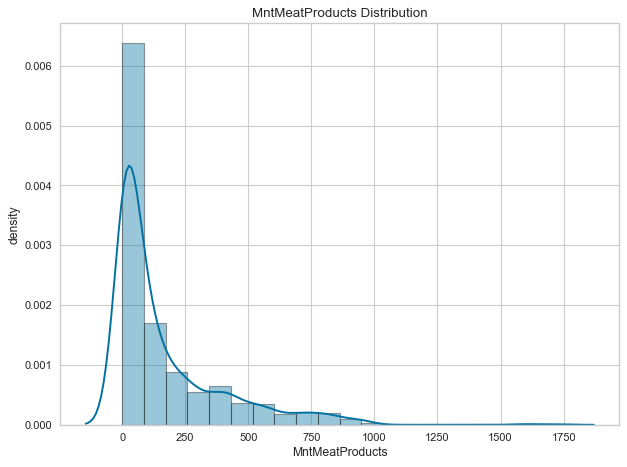

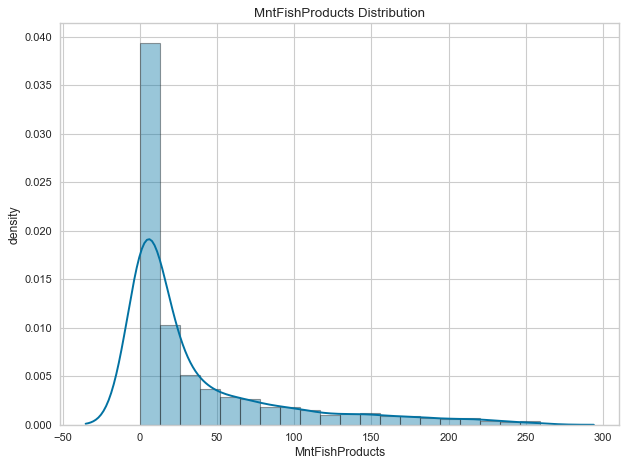

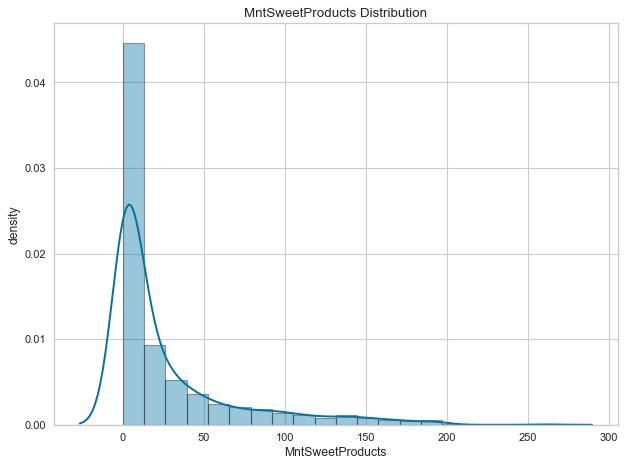

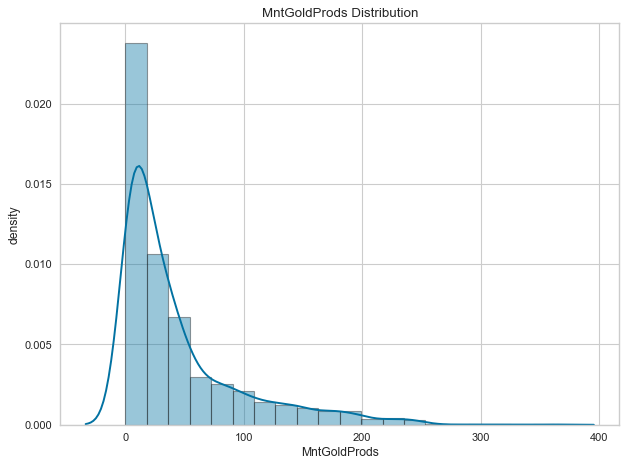

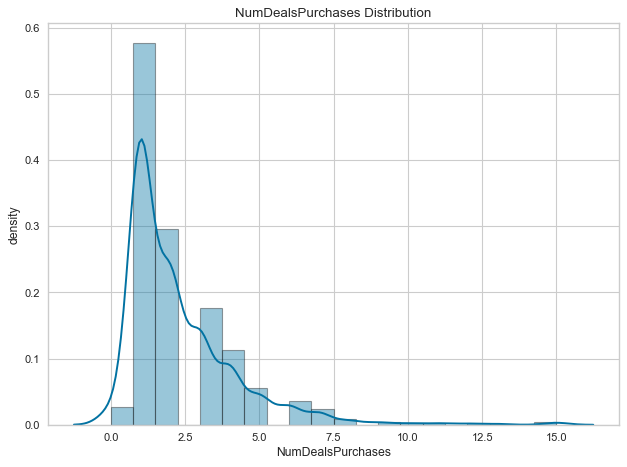

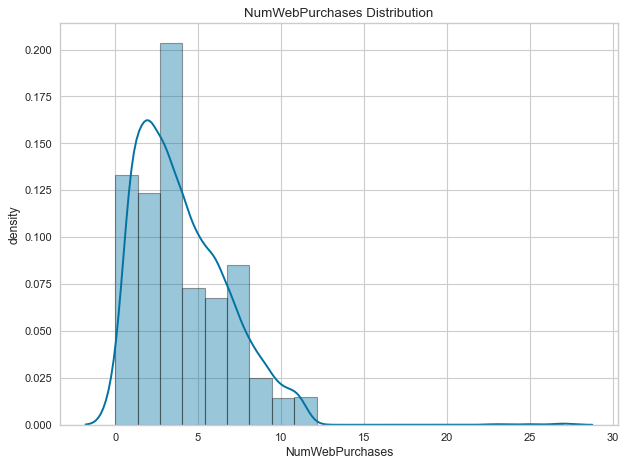

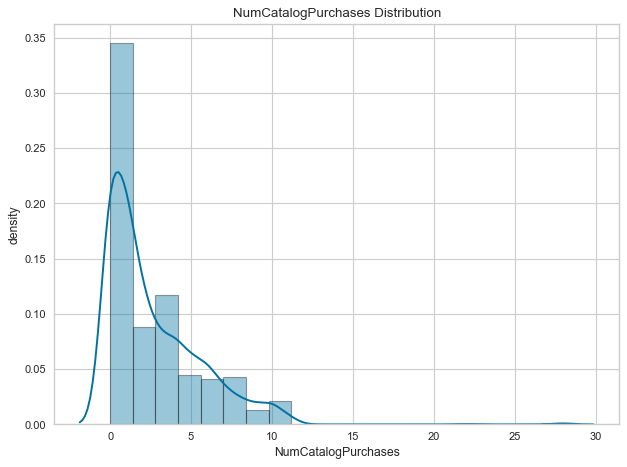

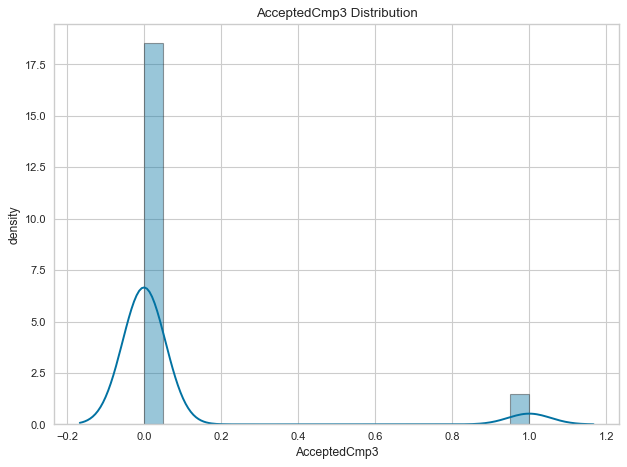

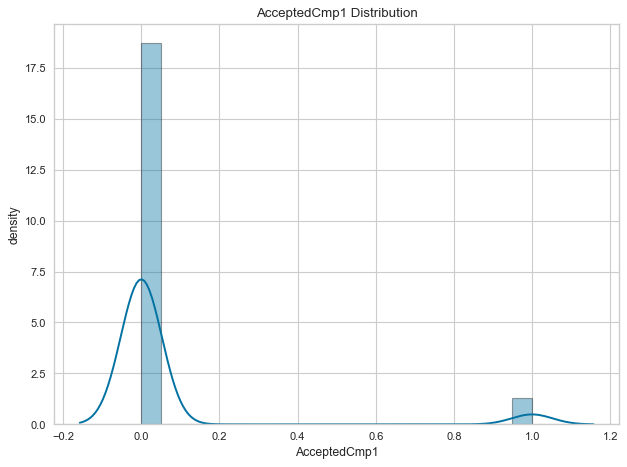

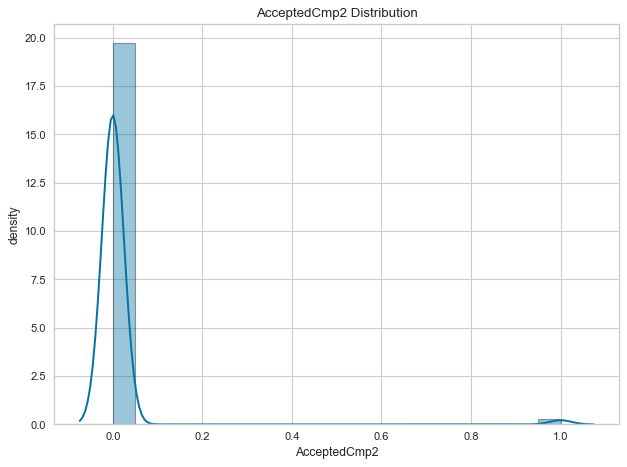

In [178]:
import warnings
warnings.filterwarnings('ignore')
num_columns = df_new.select_dtypes(include=['int64', 'float64']).columns
for col in num_columns :
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[col], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(col + ' Distribution')
    plt.ylabel("density")

    plt.tight_layout()
    plt.show()

In [179]:
#checking for skewness
sns.distplot(df_new['Income'])
plt.axvline(x=np.mean(df_new['Income']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df_new['Income'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df_new['Income'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [180]:
from scipy.stats import skew

# Select numerical columns
numerical_columns = df_new.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical column
skewness = df_new[numerical_columns].apply(lambda x: skew(x.dropna()))

# Filter columns with right skewness (skewness > 0)
right_skewed_columns = skewness[skewness > 0].index

# Display columns with right skewness and their skewness values
for col in right_skewed_columns:
    print(f"Column '{col}' has skewness of {skewness[col]} (right skew)")

Column 'ID' has skewness of 0.03980519471046203 (right skew)
Column 'Income' has skewness of 6.795410359504241 (right skew)
Column 'Kidhome' has skewness of 0.6348629678489649 (right skew)
Column 'Teenhome' has skewness of 0.4068422055022791 (right skew)
Column 'MntWines' has skewness of 1.1749830708938132 (right skew)
Column 'MntFruits' has skewness of 2.1006554110275215 (right skew)
Column 'MntMeatProducts' has skewness of 2.0818378311977765 (right skew)
Column 'MntFishProducts' has skewness of 1.9184831718871358 (right skew)
Column 'MntSweetProducts' has skewness of 2.1346500348068758 (right skew)
Column 'MntGoldProds' has skewness of 1.8848423570307615 (right skew)
Column 'NumDealsPurchases' has skewness of 2.416949508619042 (right skew)
Column 'NumWebPurchases' has skewness of 1.3818681457832678 (right skew)
Column 'NumCatalogPurchases' has skewness of 1.879728952699662 (right skew)
Column 'NumStorePurchases' has skewness of 0.701766949843736 (right skew)
Column 'NumWebVisitsMonth

### Correlation

In [181]:
# Check for non-numeric values in each column
for col in df_new.columns:
    if not pd.api.types.is_numeric_dtype(df_new[col]):
        print(f"Column '{col}' contains non-numeric values.")

# Convert non-numeric columns to numeric using one-hot encoding
data_numeric = df_new.select_dtypes(include=['int64', 'float64'])
#pd.get_dummies(df_new, drop_first=True)
# Calculate correlation matrix
corr = data_numeric.corr()
plt.figure(figsize=(15,15))
sns.heatmap(np.round(corr,2),annot=True,cmap='coolwarm')
plt.show()

Column 'Education' contains non-numeric values.
Column 'Marital_Status' contains non-numeric values.
Column 'Dt_Customer' contains non-numeric values.


In [182]:
#checking outliers
Q1 = df_new["Income"].quantile(0.25)
Q3 = df_new["Income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = df_new[(df_new["Income"] >= lower_bound) & (df["Income"] <= upper_bound)]

<Axes: >

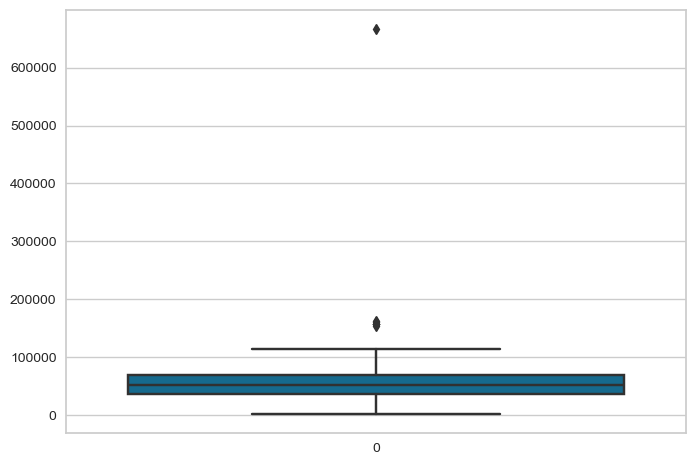

In [183]:
sns.boxplot(df_new["Income"])

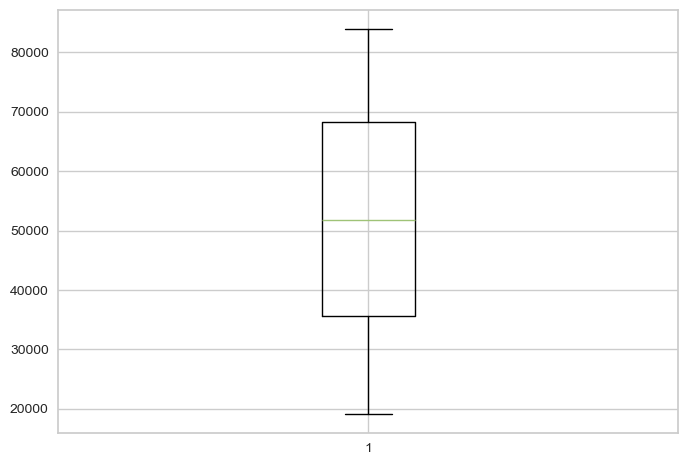

In [184]:
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df_new['Income'],limits=[0.05,0.05])
df_new['Income']= winsorized_data

#df['Income']= winsorized_data
plt.boxplot(df_new['Income']);

In [185]:
df_new.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [186]:
#outliers detecting and treatment of others columns -
# detecting others columns outliers ---
column_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','MntWines','MntFruits',
                             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
data_no_outliers = df_new.copy()

for column in column_to_remove_outliers :
    q1 = data_no_outliers[column].quantile(0.25)
    q3 = data_no_outliers[column].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[column]>= lower_bound) & (data_no_outliers[column]<= upper_bound)]

print('shape of dataframe after removing outliers;',data_no_outliers.shape)


shape of dataframe after removing outliers; (1214, 27)


In [187]:
from scipy.stats import zscore

column_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','MntWines','MntFruits',
                             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',]

z_scores = zscore(df_new[column_to_remove_outliers])   # zscore calculation
z_score_threhold=3

data_no_outliers = df_new[(abs(z_scores) < z_score_threhold).all(axis =1)]

print('shape of dataframe after removing outliers;',data_no_outliers.shape)
df_new= data_no_outliers
df_new= df_new.reset_index(drop=True)
df_new

shape of dataframe after removing outliers; (1985, 27)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957  Graduation         Single  58138.0        0         0   
1     2174        1954  Graduation         Single  46344.0        1         1   
2     4141        1965  Graduation       Together  71613.0        0         0   
3     6182        1984  Graduation       Together  26646.0        1         0   
4     5324        1981         PhD        Married  58293.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
1980  8372        1974  Graduation        Married  34421.0        1         0   
1981  4001        1946         PhD       Together  64014.0        2         1   
1982  7270        1981  Graduation       Divorced  56981.0        0         0   
1983  8235        1956      Master       Together  69245.0        0         1   
1984  9405        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0     2012-09-04       58       635  ...                   10   
1     2014-03-08       38        11  ...                    1   
2     2013-08-21       26       426  ...                    2   
3     2014-02-10       26        11  ...                    0   
4     2014-01-19       94       173  ...                    3   
...          ...      ...       ...  ...                  ...   
1980  2013-07-01       81         3  ...                    0   
1981  2014-06-10       56       406  ...                    2   
1982  2014-01-25       91       908  ...                    3   
1983  2014-01-24        8       428  ...                    5   
1984  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
1980                  2                  7             0             0   
1981                  5                  7             0             0   
1982                 13                  6             0             1   
1983                 10                  3             0             0   
1984                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
1980             0             0             0         0         0  
1981             0             1             0         0         0  
1982             0             0             0         0         0  
1983             0             0             0         0         0  
1984             0             0             0         0         1  

[1985 rows x 27 columns]

### Data Preprocessing

### Feature Engineering

1. For Education and Marital_Status-

In [188]:
df_new['Marital_Status'].value_counts()

Marital_Status
Married     767
Together    523
Single      417
Divorced    209
Widow        63
Alone         3
YOLO          2
Absurd        1
Name: count, dtype: int64

In [189]:
df_new['Education'].value_counts()

Education
Graduation    973
PhD           446
Master        338
2n Cycle      175
Basic          53
Name: count, dtype: int64

In [190]:
#creating features
df_new['Year_Birth'] = df_new['Year_Birth'].astype(int)


# converting year_birth column into age --
current_year =2024 #assuming the data was collected at 2024
df_new['Age'] = current_year - df_new['Year_Birth']
df_new.drop(columns=['Year_Birth'],inplace=True)
df_new.to_csv('marketing_campaign_nd.csv',index=False)
df_new

df_new['TotalAcceptedCmp'] = df_new[['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5', 'Response']].sum(axis=1)

columns_to_drop4 = ['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5', 'Response']
df_new.drop(columns=columns_to_drop4, inplace=True)


df_new['TotalPurchases'] = df_new[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1) #the total number of pruchase

# Drop the original purchase columns to avoid repetition
columns_to_drop1 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_new.drop(columns=columns_to_drop1, inplace=True)


df_new['Childrens'] = df_new[['Kidhome' , 'Teenhome']].sum(axis=1) #number of children that customer has
columns_to_drop2 = ['Kidhome' , 'Teenhome']
df_new.drop(columns=columns_to_drop2, inplace=True)
df_new['Marital_Status'] = df_new['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df_new['Marital_Status'] = df_new['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

df_new['Spending']=df_new[[ 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].aggregate([sum] ,axis = 1) #amount of money the customer pay it


df_new['Education'] = df_new['Education'].replace(['2n Cycle','Graduation'],'Graduate') #simplifying education
df_new['Education'] = df_new['Education'].replace(['Basic'], 'Under Graduate')
df_new['Education'] = df_new['Education'].replace(['PhD','Master'], 'Post Graduate')

In [191]:
columns_to_drop3 = ['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df_new.drop(columns=columns_to_drop3, inplace=True)

In [192]:
'''df_new['Savings']=df_new['Income'] - df_new['Spending'] #The amount of money the customer saves
df_new.drop(columns=['Income','Spending'],inplace=True)
df_new.columns'''

"df_new['Savings']=df_new['Income'] - df_new['Spending'] #The amount of money the customer saves\ndf_new.drop(columns=['Income','Spending'],inplace=True)\ndf_new.columns"

In [193]:
df_new.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Age', 'TotalAcceptedCmp',
       'TotalPurchases', 'Childrens', 'Spending'],
      dtype='object')

Dropping ID and Dt_Customer

In [194]:
df_new.drop(['ID','Dt_Customer'],axis=1,inplace=True)
df_new.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Age', 'TotalAcceptedCmp', 'TotalPurchases', 'Childrens',
       'Spending'],
      dtype='object')

### Scaling and Normalization

Label Encoding - use label encoder to convert categorical variables to numerical values.

In [195]:
from sklearn.preprocessing import LabelEncoder as le

In [196]:
df_new['Education'] = le().fit_transform(df_new['Education'])
df_new['Marital_Status'] = le().fit_transform(df_new['Marital_Status'])


In [197]:
df_new

Education  Marital_Status   Income  Recency  NumWebVisitsMonth  \
0             0               1  58138.0       58                  7   
1             0               1  46344.0       38                  5   
2             0               0  71613.0       26                  4   
3             0               0  26646.0       26                  6   
4             1               0  58293.0       94                  5   
...         ...             ...      ...      ...                ...   
1980          0               0  34421.0       81                  7   
1981          1               0  64014.0       56                  7   
1982          0               1  56981.0       91                  6   
1983          1               0  69245.0        8                  3   
1984          1               0  52869.0       40                  7   

      Complain  Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  
0            0   67                 1              25          0      1617  
1            0   70                 0               6          2        27  
2            0   59                 0              21          0       776  
3            0   40                 0               8          1        53  
4            0   43                 0              19          1       422  
...        ...  ...               ...             ...        ...       ...  
1980         0   50                 0               4          1        30  
1981         0   78                 1              22          3       444  
1982         0   43                 1              19          0      1241  
1983         0   68                 0              23          1       843  
1984         0   70                 1              11          2       172  

[1985 rows x 11 columns]

In [198]:
df_new.isnull().sum()

Education            0
Marital_Status       0
Income               0
Recency              0
NumWebVisitsMonth    0
Complain             0
Age                  0
TotalAcceptedCmp     0
TotalPurchases       0
Childrens            0
Spending             0
dtype: int64

In [199]:
df_new = df_new.dropna()

In [200]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_new)
data_scaled = pd.DataFrame(data_scaled, columns=df_new.columns)
data_scaled.head()

Education  Marital_Status    Income   Recency  NumWebVisitsMonth  Complain  \
0   0.000000        0.000017  0.999612  0.000997           0.000120       0.0   
1   0.000000        0.000022  0.999998  0.000820           0.000108       0.0   
2   0.000000        0.000000  0.999941  0.000363           0.000056       0.0   
3   0.000000        0.000000  0.999996  0.000976           0.000225       0.0   
4   0.000017        0.000000  0.999972  0.001612           0.000086       0.0   

        Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  
0  0.001152          0.000017        0.000430   0.000000  0.027802  
1  0.001510          0.000000        0.000129   0.000043  0.000583  
2  0.000824          0.000000        0.000293   0.000000  0.010835  
3  0.001501          0.000000        0.000300   0.000038  0.001989  
4  0.000738          0.000000        0.000326   0.000017  0.007239

### Dimensionality Reduction

In [201]:
from sklearn.preprocessing import StandardScaler
data_standard = data_scaled.copy()
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_scaled)
scaled_data = pd.DataFrame(data_standard,columns=data_scaled.columns)
scaled_data.head()

Education  Marital_Status    Income   Recency  NumWebVisitsMonth  Complain  \
0  -0.609118        0.668469 -3.878120 -0.201407          -0.239575  -0.09445   
1  -0.609118        1.001903  0.730054 -0.389715          -0.362128  -0.09445   
2  -0.609118       -0.639259  0.043978 -0.875036          -0.873621  -0.09445   
3  -0.609118       -0.639259  0.706306 -0.224230           0.790731  -0.09445   
4   0.343430       -0.639259  0.417760  0.452105          -0.579533  -0.09445   

        Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  
0 -0.245864          0.633019        1.298895  -1.173069  2.705012  
1  0.389258         -0.475377       -1.391932   0.819042 -1.077136  
2 -0.827304         -0.475377        0.075043  -1.173069  0.347474  
3  0.372810         -0.475377        0.137805   0.559315 -0.881714  
4 -0.980020         -0.475377        0.368020  -0.381207 -0.152226

In [202]:
from sklearn.decomposition import PCA
scaled_df_new = scaled_data.copy()
pca = PCA(n_components=3,random_state = 42)
scaled_df_new = pca.fit_transform(scaled_df_new)
pca_df = pd.DataFrame(scaled_df_new, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

PC1       PC2       PC3
0 -3.618343  3.086435  0.358098
1  1.174354 -1.614534 -0.429833
2 -1.710060 -0.962904  0.246497
3  1.125054 -0.607928  0.557756
4 -0.449126 -0.497523  0.211418

In [203]:
import plotly.graph_objects as go
x = pca_df["PC1"]
y = pca_df["PC2"]
z = pca_df["PC3"]

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=6, color="#682F2F", opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Dimensionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="white")
fig.show()

### Machine Learning/ Model Building

### K- Means Clustering
K-means clustering, a part of the unsupervised learning family in AI, is used to group similar data points together in a process known as clustering. Clustering helps us understand our data in a unique way – by grouping things together into clusters.

In [204]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Elbow Curve
The Elbow Method is a technique used in data analysis and machine learning for determining the optimal number of clusters in a dataset. It involves plotting the variance explained by different numbers of clusters and identifying the “elbow” point.

The rate of variance decreases sharply levels off, suggesting an appropriate cluster count for analysis or model training.

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [205]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [206]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(pca_df)
elbow_graph.show()


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

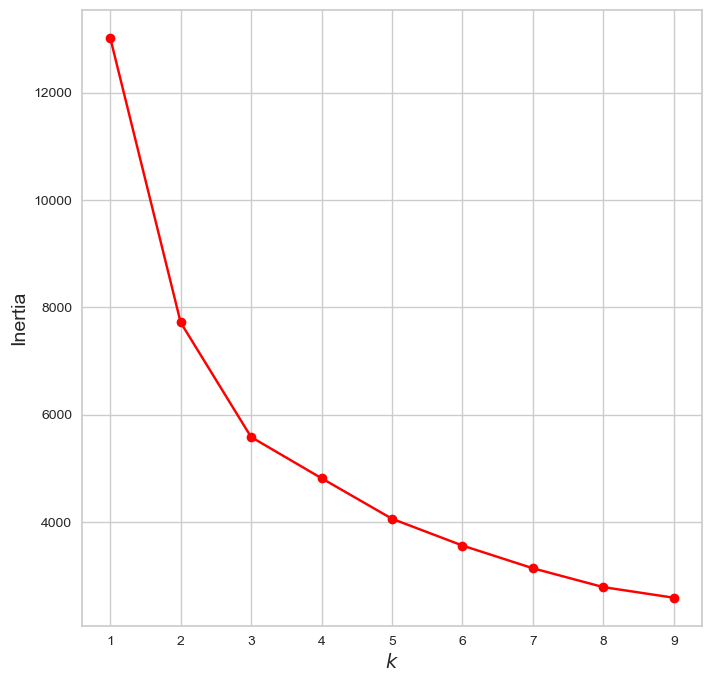

In [207]:
plt.figure(figsize = (8,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(pca_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-" ,color="red")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

In [208]:
plt.figure(figsize = (8,8) )
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(pca_df, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-" ,color="red")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [209]:
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 4, random_state=42)
#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
print(label)

[3 1 0 ... 3 0 1]


In [210]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = pca_df[label == 0]
filtered_label1 = pca_df[label == 1]
filtered_label2 = pca_df[label == 2]
filtered_label3 = pca_df[label == 3]



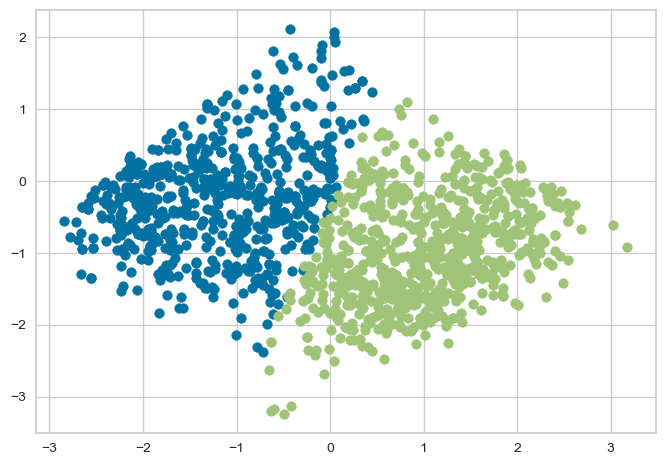

In [211]:
# Select the first column of filtered_label0
plt.scatter(filtered_label0.iloc[:, 0], filtered_label0.iloc[:, 1])

# Select the first column of filtered_label1
plt.scatter(filtered_label1.iloc[:, 0], filtered_label1.iloc[:, 1])

# Show the plot
plt.show()

In [212]:
filtered_label2 = pca_df[label == 2]
filtered_label3 = pca_df[label == 3]

#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'blue')
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'orange')

plt.show()


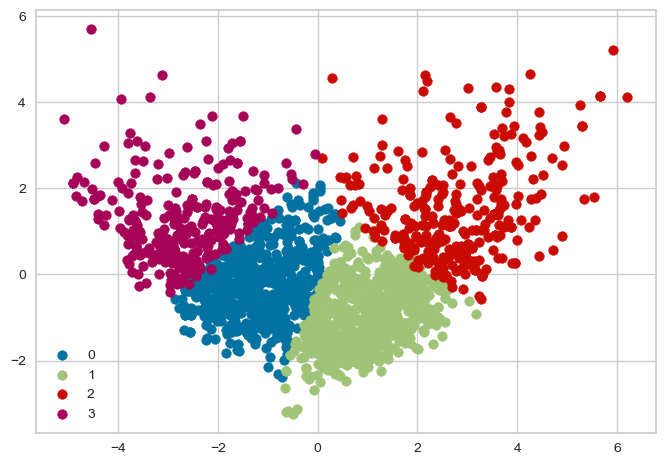

In [213]:
#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(pca_df.iloc[label == i , 0] , pca_df.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

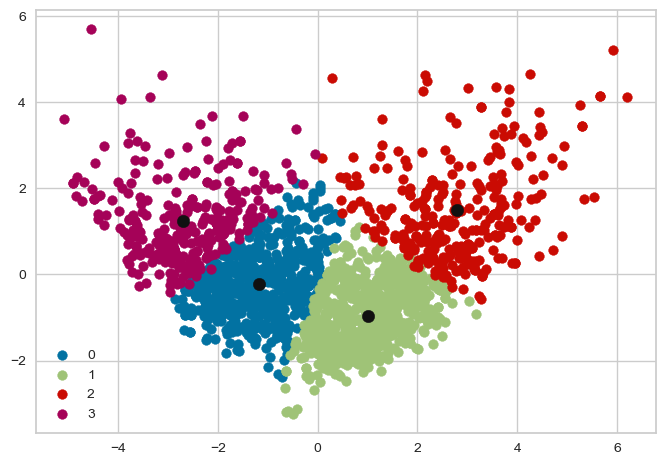

In [214]:
#plotting cluster centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(pca_df.iloc[label == i , 0] , pca_df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [215]:
label = kmeans.fit_predict(pca_df)
print(label)

[3 1 0 ... 3 0 1]


In [216]:
clustered_data = pca_df.copy()
clustered_data["Cluster"] = label

cluster_0_data = clustered_data[clustered_data["Cluster"] == 0]
cluster_1_data = clustered_data[clustered_data["Cluster"] == 1]
cluster_2_data = clustered_data[clustered_data["Cluster"] == 2]
cluster_3_data = clustered_data[clustered_data["Cluster"] == 3]

In [217]:
print("Cluster 0:")
print(cluster_0_data.describe())

Cluster 0:
              PC1         PC2         PC3  Cluster
count  613.000000  613.000000  613.000000    613.0
mean    -1.175367   -0.223436    0.143276      0.0
std      0.746268    0.773325    0.648757      0.0
min     -2.846706   -2.377364   -1.514732      0.0
25%     -1.798153   -0.747309   -0.152191      0.0
50%     -1.163447   -0.229138    0.124650      0.0
75%     -0.576643    0.214991    0.396824      0.0
max      0.449405    2.115341    5.428781      0.0


In [218]:
print("Cluster 1:")
print(cluster_1_data.describe())


Cluster 1:
              PC1         PC2         PC3  Cluster
count  745.000000  745.000000  745.000000    745.0
mean     0.996673   -0.962553   -0.124911      1.0
std      0.724394    0.722157    0.896255      0.0
min     -0.648149   -3.241955   -2.890269      1.0
25%      0.448124   -1.540981   -0.574093      1.0
50%      0.951108   -1.023904   -0.159254      1.0
75%      1.531639   -0.397521    0.289760      1.0
max      3.179572    1.102768    8.438971      1.0


In [219]:
print("Cluster 2:")
print(cluster_2_data.describe())

Cluster 2:
              PC1         PC2         PC3  Cluster
count  304.000000  304.000000  304.000000    304.0
mean     2.787852    1.501626    0.028869      2.0
std      1.086495    1.136272    1.861527      0.0
min      0.083842   -0.575293   -4.913992      2.0
25%      2.122318    0.641599   -1.034445      2.0
50%      2.764930    1.293913   -0.001172      2.0
75%      3.537395    2.101349    1.088118      2.0
max      6.205740    5.212381   13.070801      2.0


In [220]:
print("Cluster 3:")
print(cluster_3_data.describe())

Cluster 3:
              PC1         PC2         PC3  Cluster
count  323.000000  323.000000  323.000000    323.0
mean    -2.692038    1.230880   -0.010977      3.0
std      0.900315    0.925688    0.652078      0.0
min     -5.082625   -0.403414   -2.582165      3.0
25%     -3.206094    0.589104   -0.432899      3.0
50%     -2.709642    1.046572   -0.014805      3.0
75%     -2.036301    1.726276    0.442489      3.0
max     -0.044889    5.694441    2.042655      3.0


In [221]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_new['Clusters'] = kmeans.fit_predict(pca_df)

In [222]:
df_new.head()

Education  Marital_Status   Income  Recency  NumWebVisitsMonth  Complain  \
0          0               1  58138.0       58                  7         0   
1          0               1  46344.0       38                  5         0   
2          0               0  71613.0       26                  4         0   
3          0               0  26646.0       26                  6         0   
4          1               0  58293.0       94                  5         0   

   Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  Clusters  
0   67                 1              25          0      1617         3  
1   70                 0               6          2        27         1  
2   59                 0              21          0       776         0  
3   40                 0               8          1        53         1  
4   43                 0              19          1       422         0

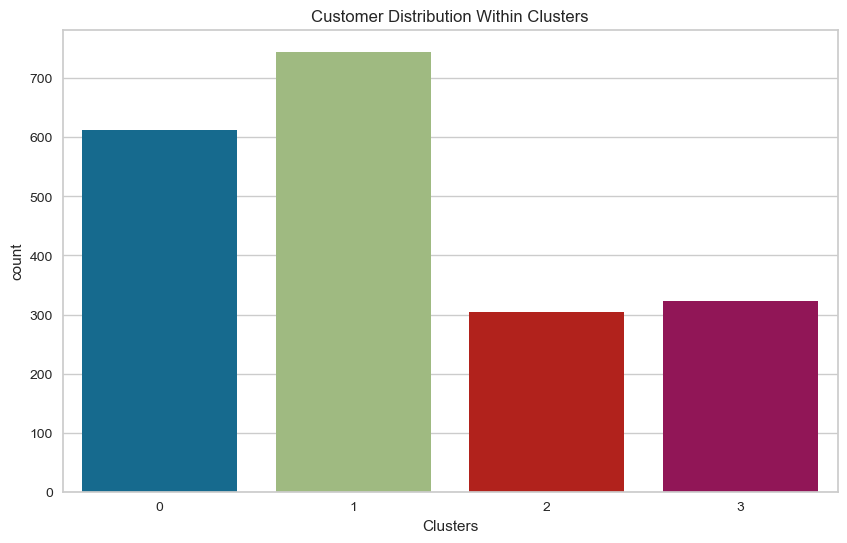

In [223]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Clusters', data=df_new)
plt.title('Customer Distribution Within Clusters')
plt.show()



*    There are more customers in cluster 0 than in clusters 1 and 2.


*   Cluster 0 might represent a larger market segment with common characteristics.
*  Clusters 1 and 2 might represent niche markets with specific characteristics.





AttributeError: 'numpy.int64' object has no attribute 'startswith'

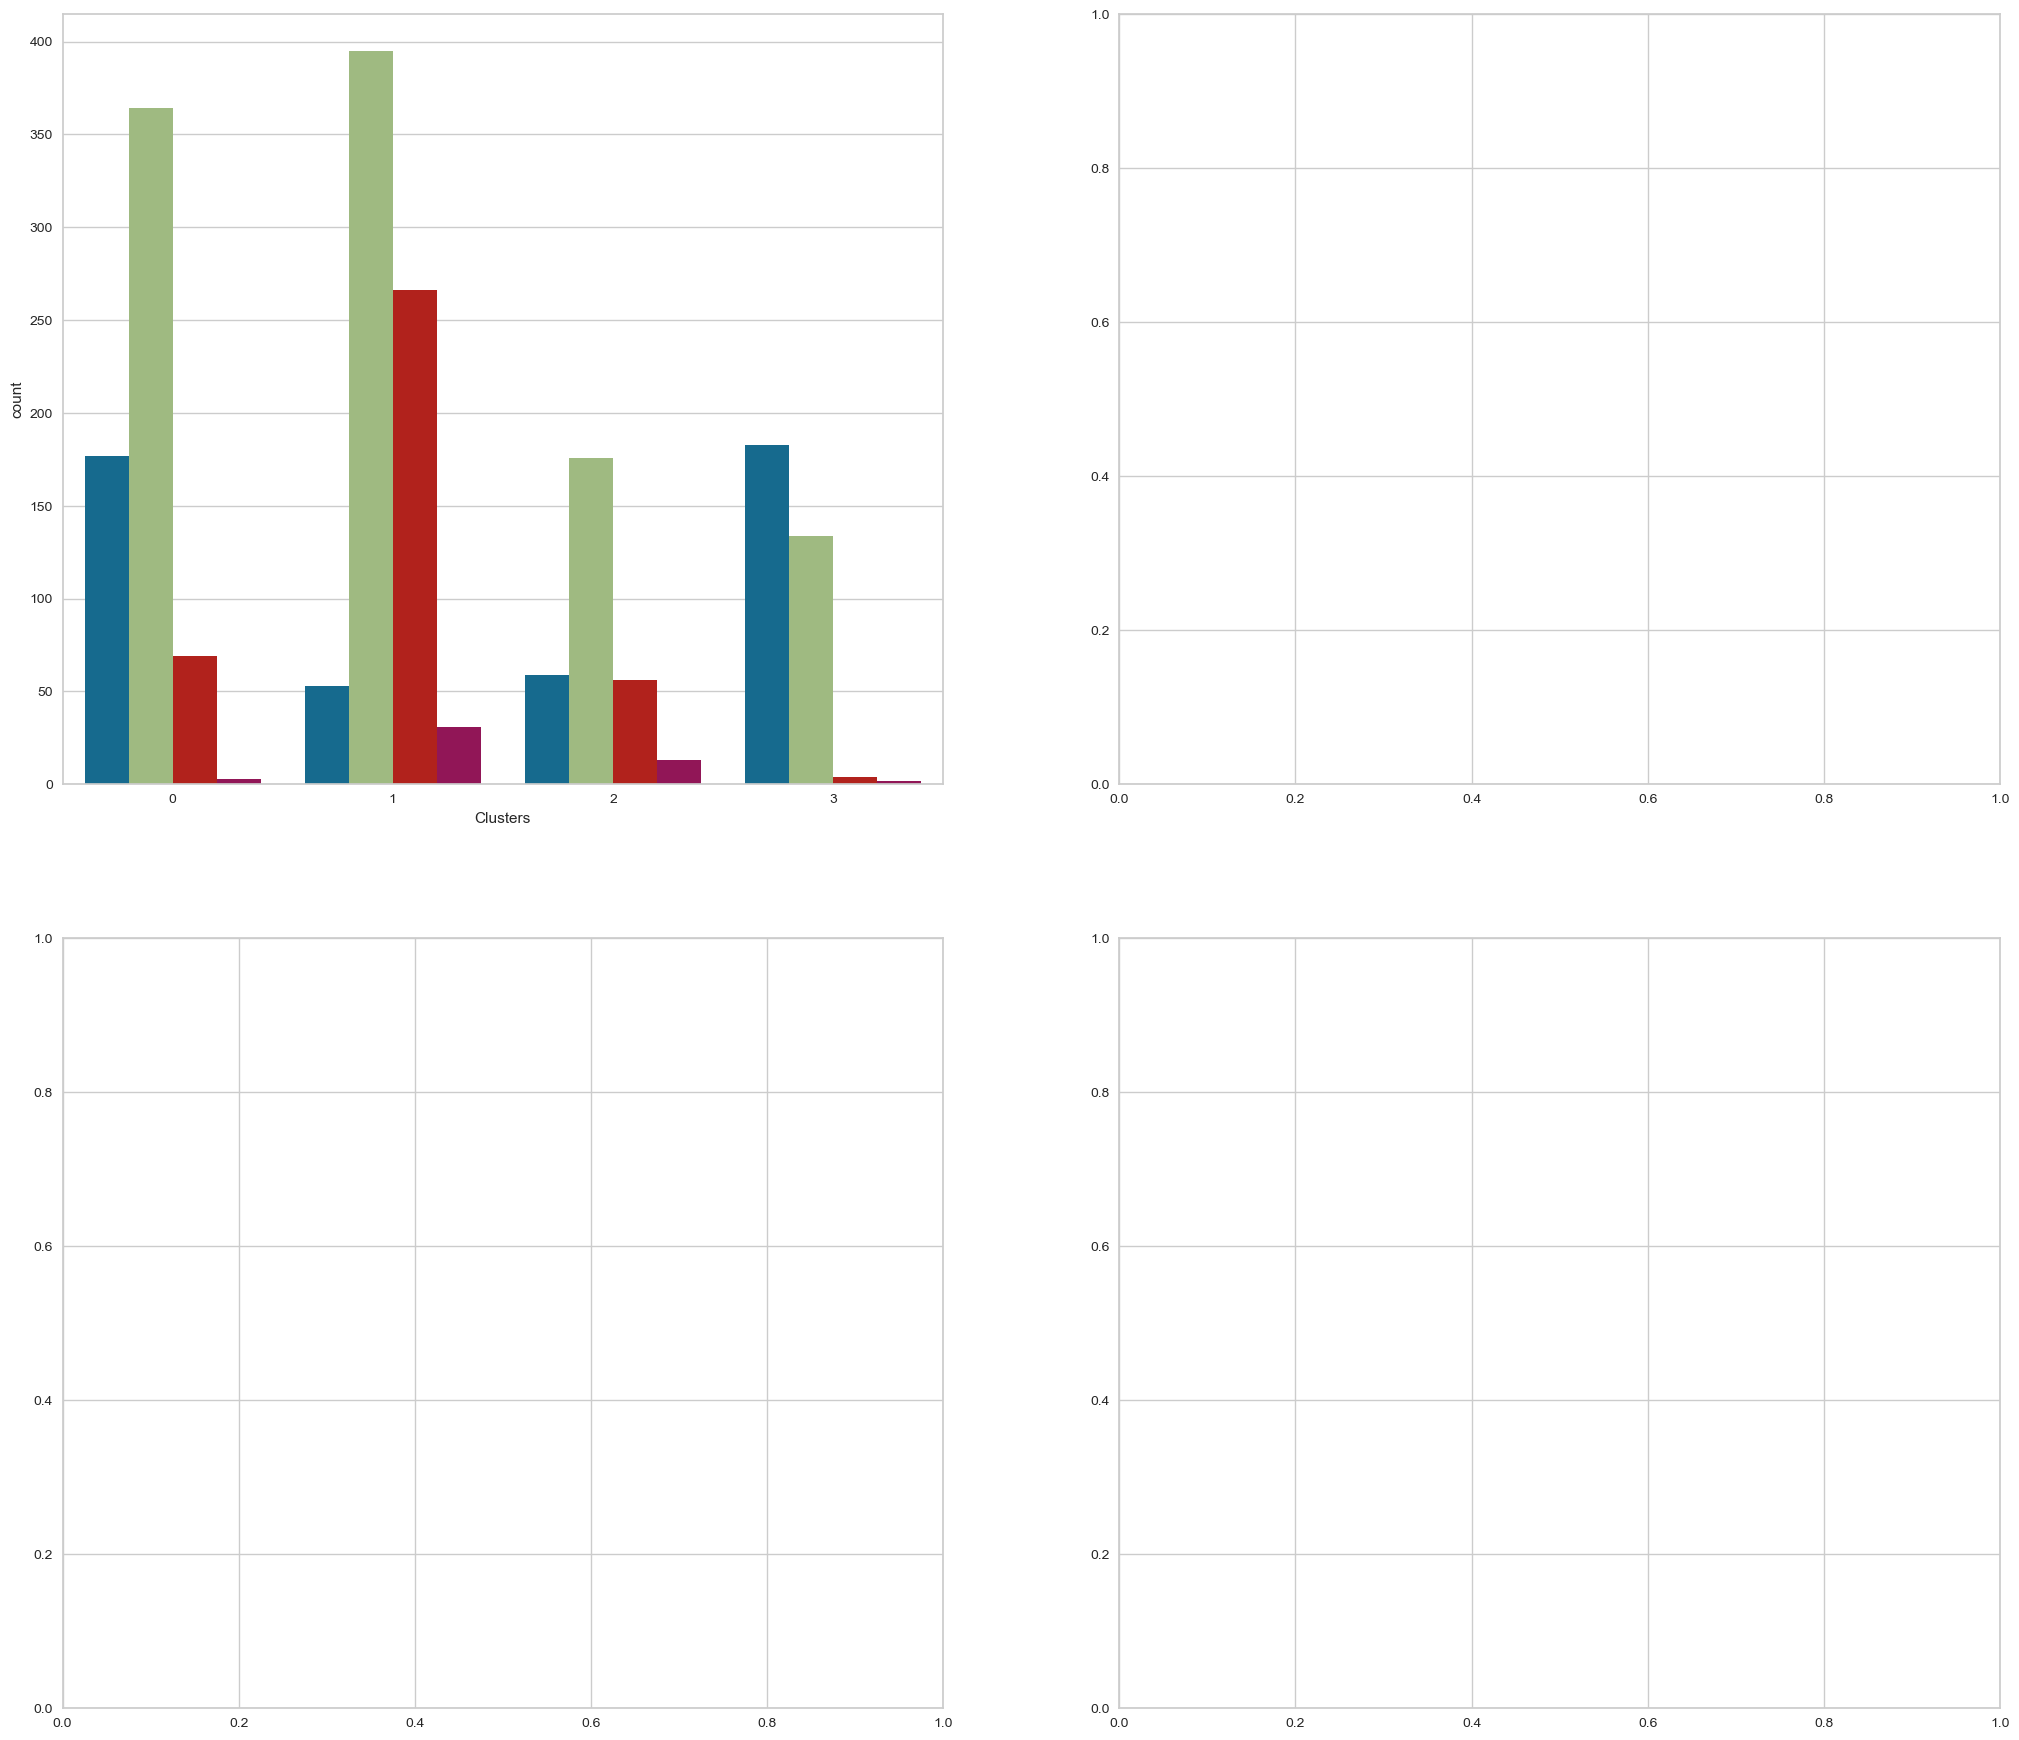

In [225]:
import seaborn as sns
count_cols= ['Childrens','Marital_Status','Education','Age']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=df_new, ax=ax1[i//2, i%2],hue=col)

plt.show()

**Observations:**

Childrens: Cluster 0 has most number of childrens are one whereas cluster 2 has less one number of children and clusters 1 and 3 has moderate number of children.
Marital Status: Cluster 0 has customers mostly together or married and cluster 2 has less together and single.
Education level:In all the Clusters customers have done graduation but cluster 0 Customers have done their masters. Age: In All Clusters most of the customers are between age 40-60 Years and cluster 3 has most of the customers are from 60 years.


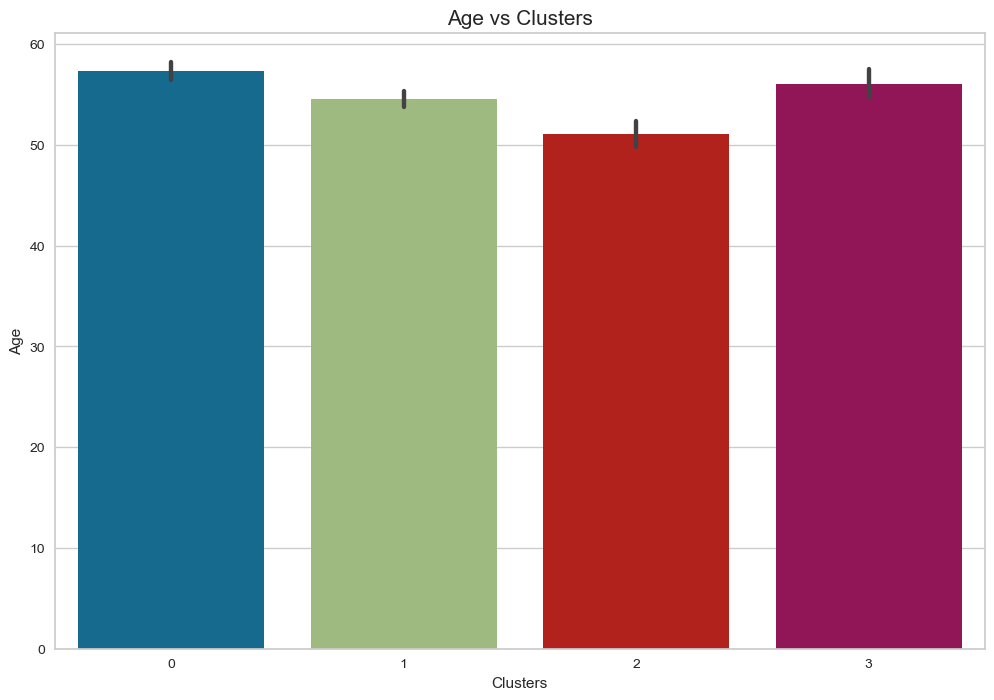

In [226]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Age"])
plt.title("Age vs Clusters", size=15)
plt.show()

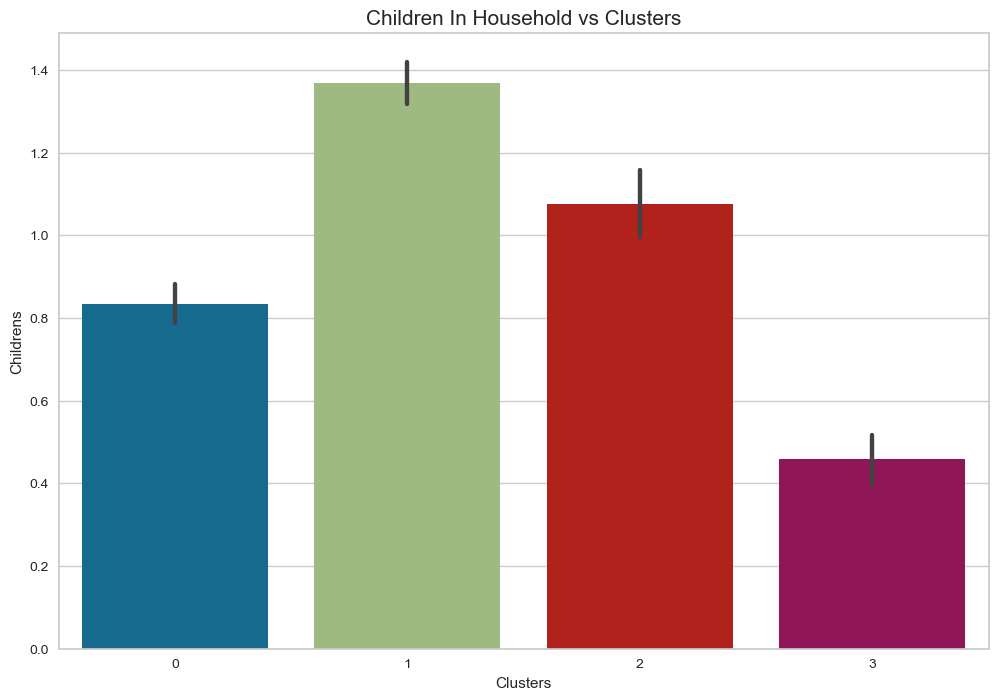

In [227]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Childrens"])
plt.title("Children In Household vs Clusters", size=15)
plt.show()

Most Of Number of Children in Household are there in Cluster 1 whereas Cluster 3 has less number of children and cluster 0 has moderate number of children.

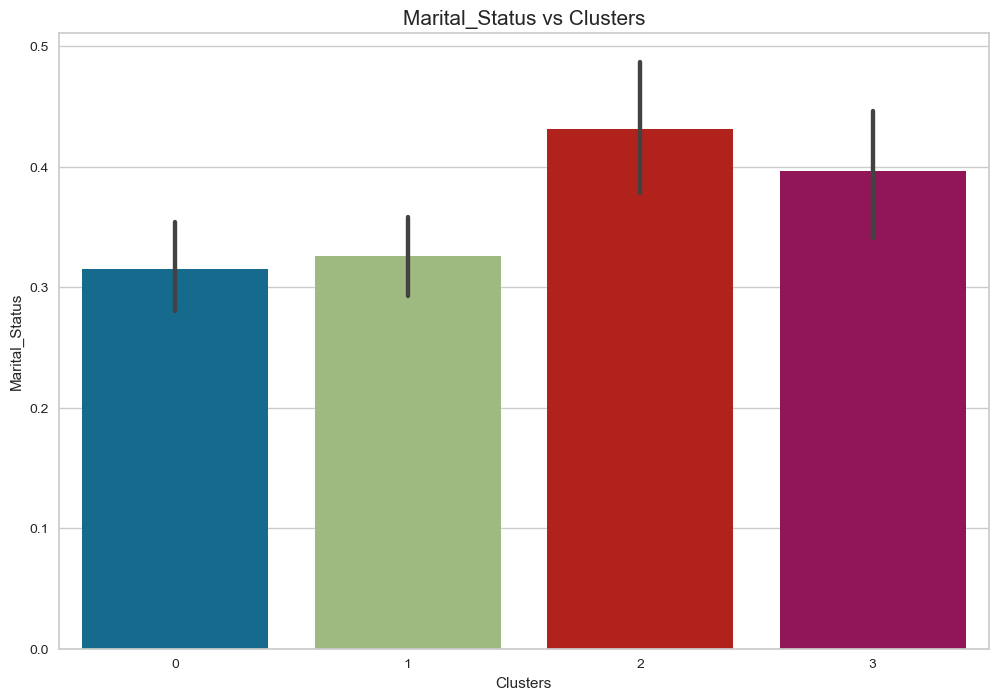

In [228]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Marital_Status"])
plt.title("Marital_Status vs Clusters", size=15)
plt.show()

Clusters 2 and 3 have customers are mostly couples and cluster 0 and 1 has moderate number of couples.

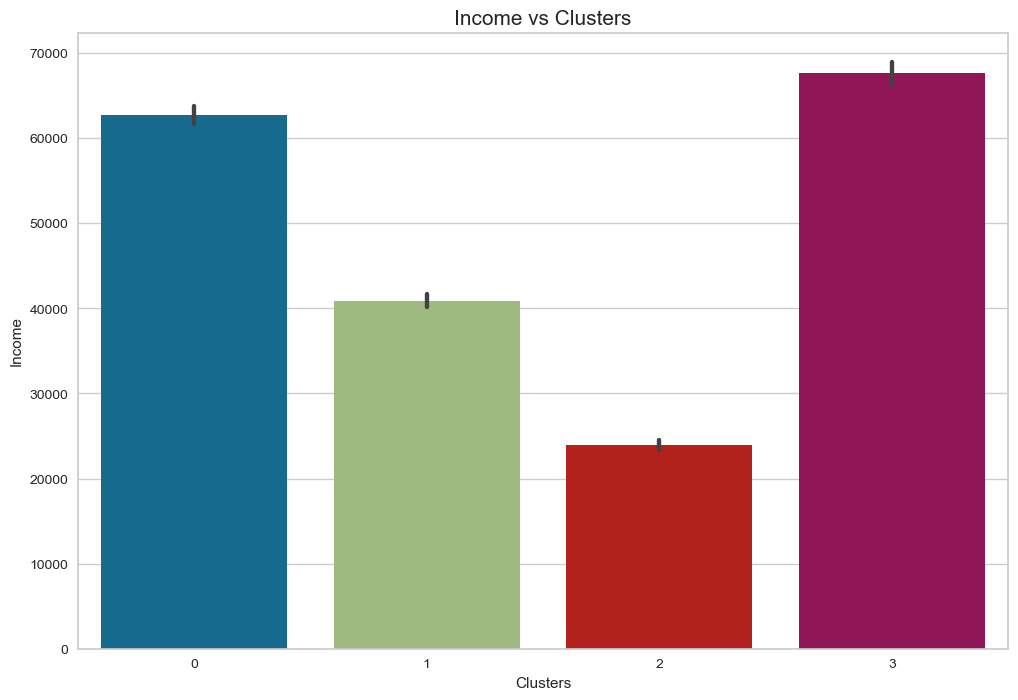

In [229]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()

Cluster 3 customers has highest income and cluster 2 has lowest income whereas cluster 1 has medium income.

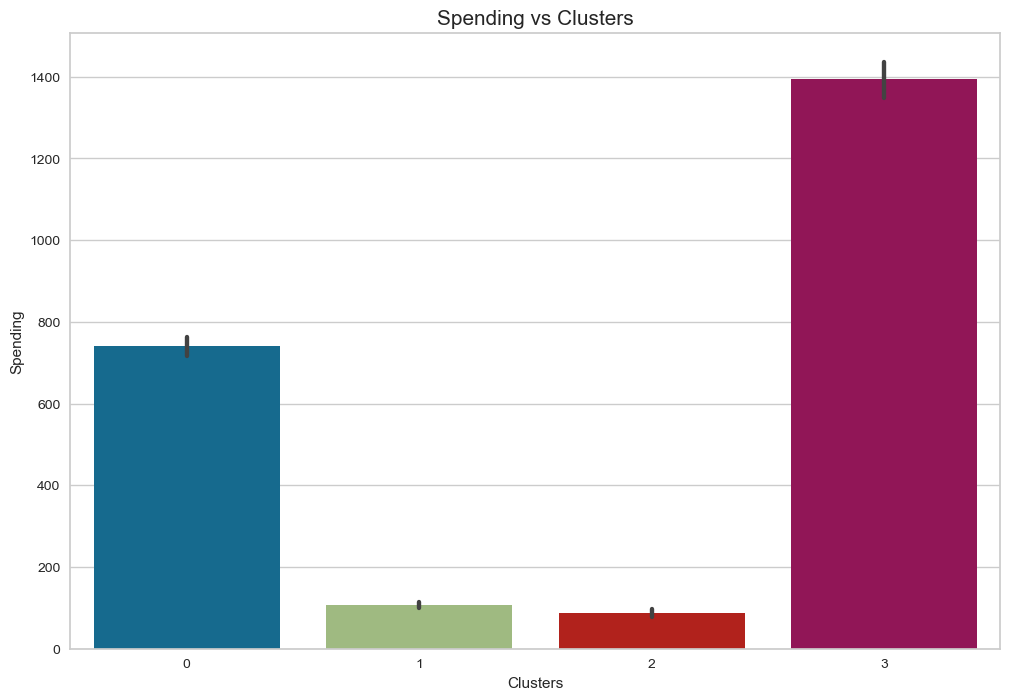

In [230]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Spending"])
plt.title("Spending vs Clusters", size=15)
plt.show()

Cluster 3 customers does highest spending whereas cluster 0 customers does moderate spending and cluster 1 and 2 least spending.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

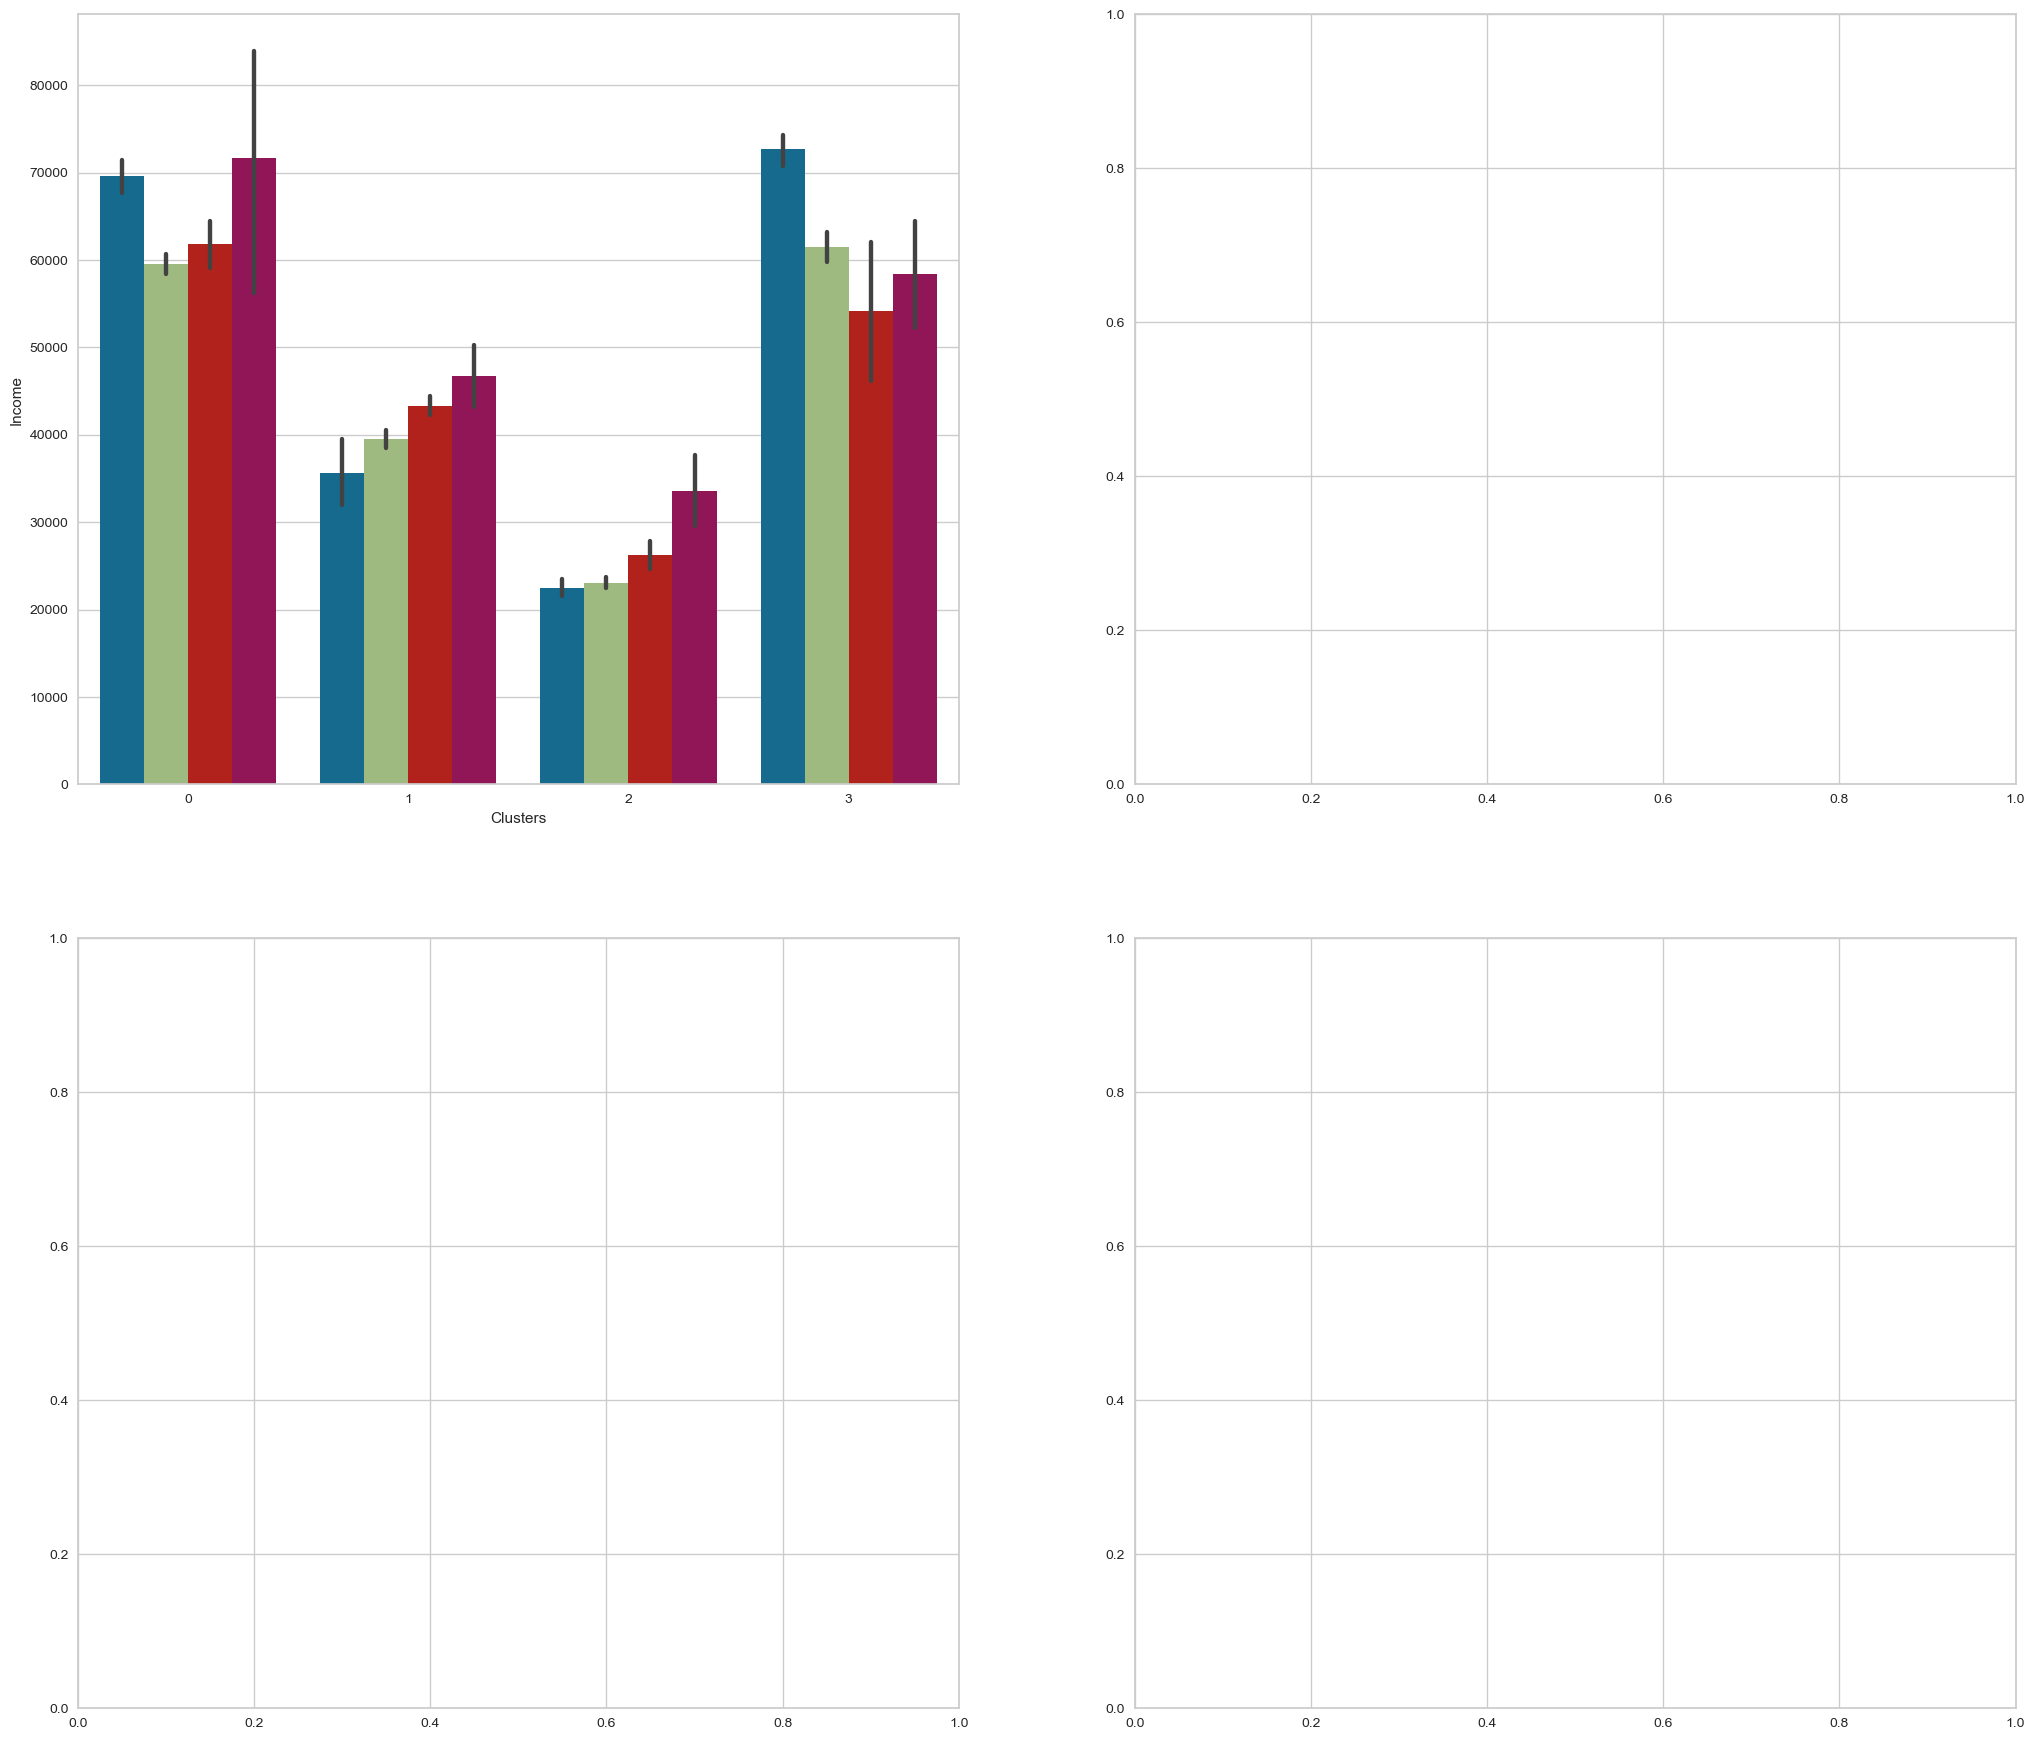

In [231]:
catcols= ['Childrens','Marital_Status','Education','Age']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=df_new, ax=ax1[i//2, i%2],hue=col)

plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["Complain"])
plt.title("Complain vs Clusters", size=15)
plt.show()

Cluster 3 customers have done most of the complain and cluster 2 has less number of complains

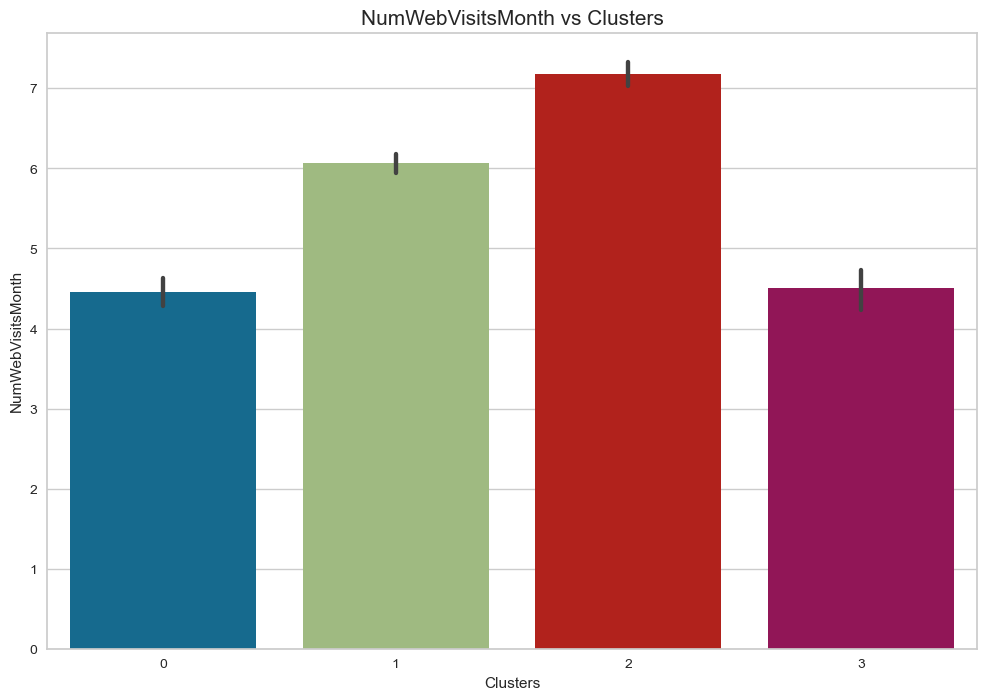

In [232]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["NumWebVisitsMonth"])
plt.title("NumWebVisitsMonth vs Clusters", size=15)
plt.show()

Cluster 1 customers does most web visits in a month whereas cluster 2 has less number of web visits.

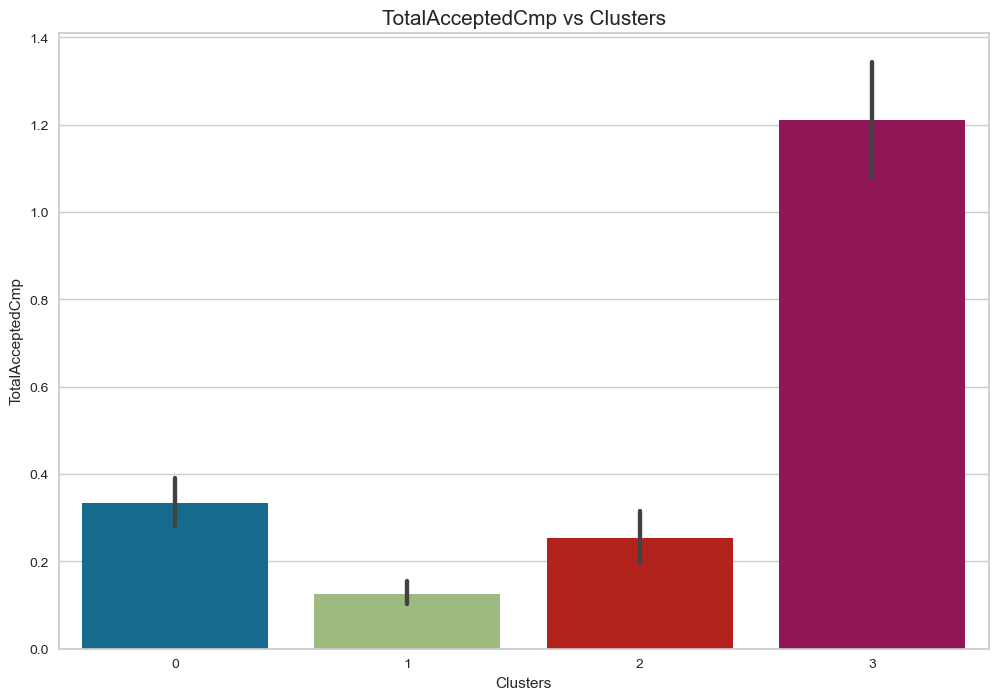

In [233]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["TotalAcceptedCmp"])
plt.title("TotalAcceptedCmp vs Clusters", size=15)
plt.show()

Cluster 2 Customers accepted offers in the campagins and cluster 1 customers has least number of accepted offers in the campagins.

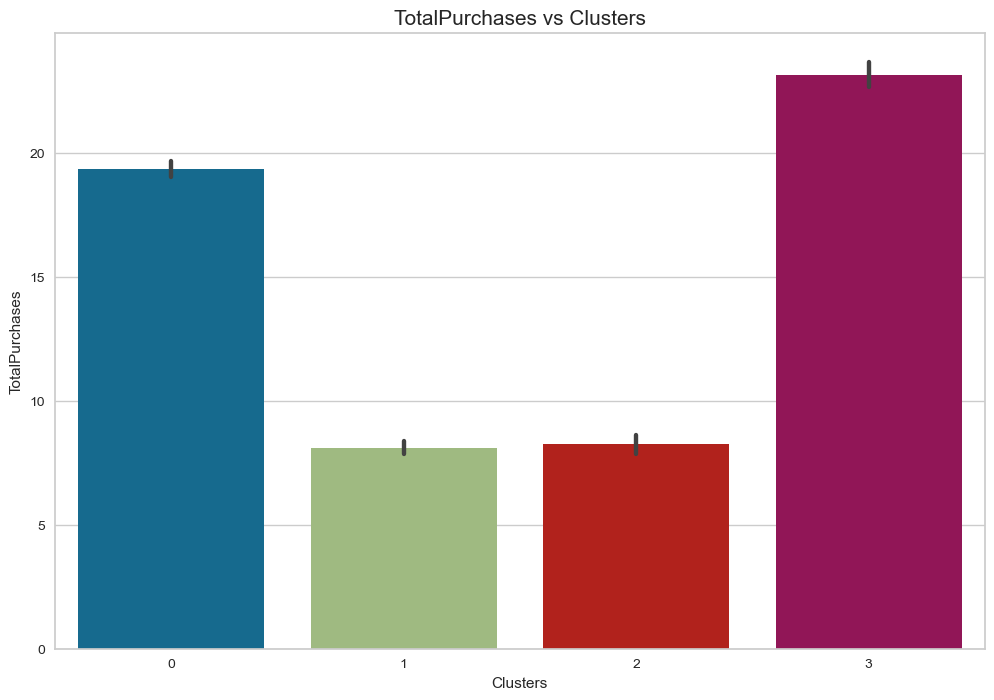

In [234]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_new["Clusters"], y=df_new["TotalPurchases"])
plt.title("TotalPurchases vs Clusters", size=15)
plt.show()

Cluster 2 has done most number of purchases and cluster 1 has least number of total purchases whereas cluster 3 has done moderate number of purchases.

### Agglomerative Clustering/ Hierarchical Clustering
Agglomerative clustering, also known as hierarchical clustering, is a method of cluster analysis that seeks to build a hierarchy of clusters. It is a bottom-up approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [235]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

### Dendrogram with WARD Linkage

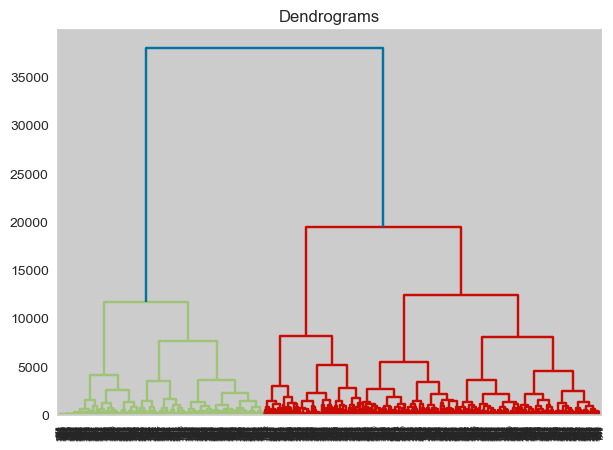

In [236]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(df_new, method='weighted'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold and cut the dendrogram:

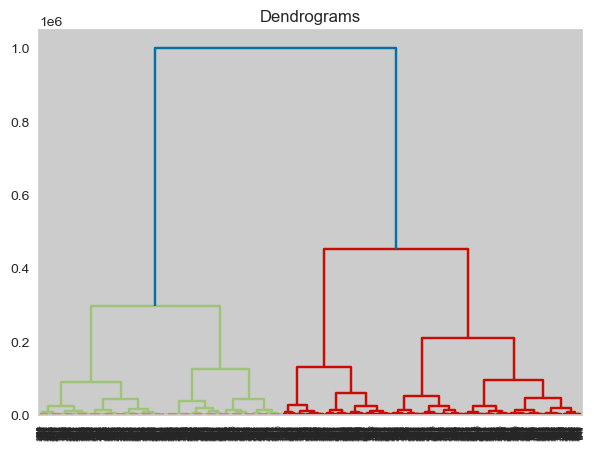

In [237]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(df_new, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

### Dendrogram with AVERAGE Linkage

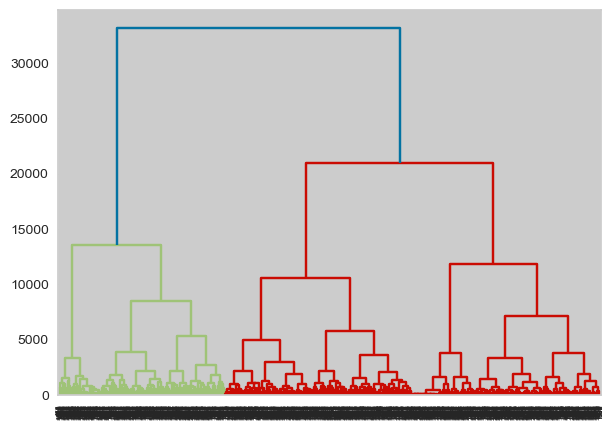

In [238]:
#create Dendrogram
plt.figure(figsize=(7, 5))
dendrogram=sch.dendrogram(sch.linkage(df_new,method='average'))

### Dendrogram with COMPLETE Linkage


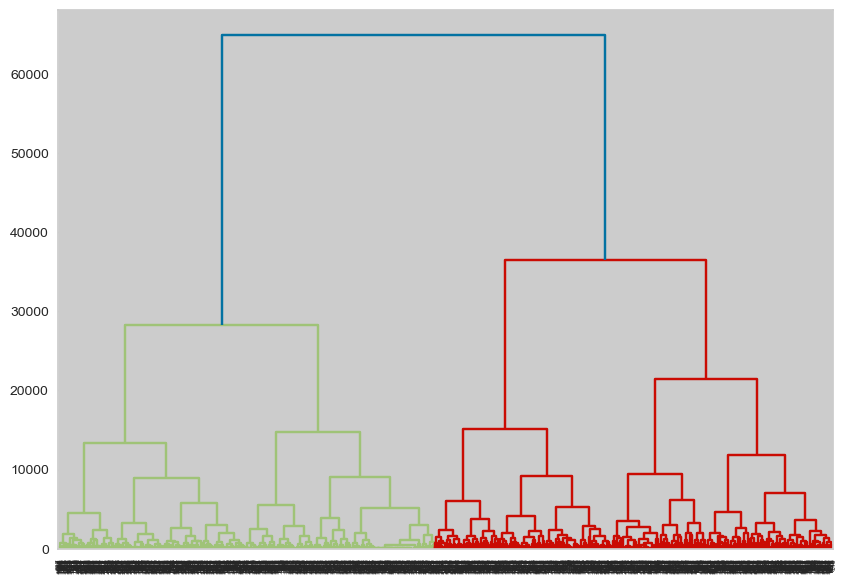

In [239]:
#create Dendrogram
plt.figure(figsize=(10, 7))
dendrogram=sch.dendrogram(sch.linkage(df_new,method='complete'))

### Dendrogram with single Linkage

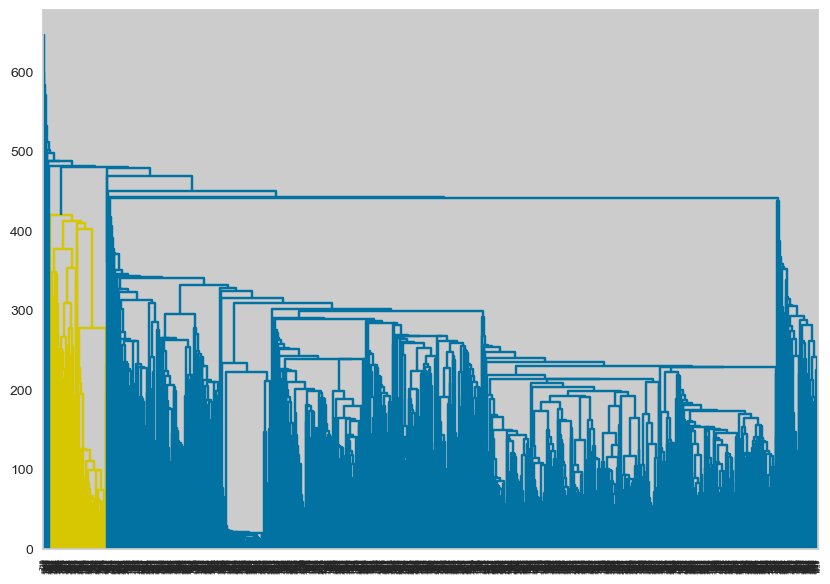

In [240]:
#create Dendrogram
plt.figure(figsize=(10, 7))
dendrogram=sch.dendrogram(sch.linkage(df_new,method='single'))


### Dendrogram with CENTROID Linkage

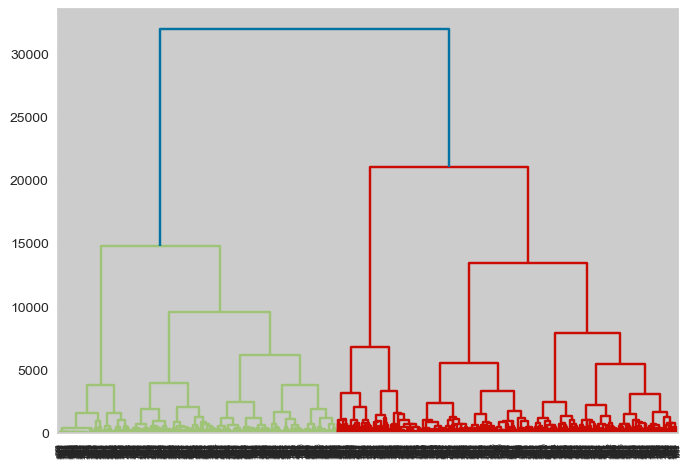

In [241]:
#create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_new,method='centroid'))

In [242]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward")

In [243]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [244]:
clusters

Clusters
0            3
1            1
2            2
3            1
4            2
...        ...
1980         1
1981         2
1982         3
1983         0
1984         1

[1985 rows x 1 columns]

In [245]:
df_new.head()

Education  Marital_Status   Income  Recency  NumWebVisitsMonth  Complain  \
0          0               1  58138.0       58                  7         0   
1          0               1  46344.0       38                  5         0   
2          0               0  71613.0       26                  4         0   
3          0               0  26646.0       26                  6         0   
4          1               0  58293.0       94                  5         0   

   Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  Clusters  
0   67                 1              25          0      1617         3  
1   70                 0               6          2        27         1  
2   59                 0              21          0       776         0  
3   40                 0               8          1        53         1  
4   43                 0              19          1       422         0

In [246]:
df_new.groupby("Clusters").agg(['mean']).reset_index()

Clusters Education Marital_Status        Income    Recency  \
                mean           mean          mean       mean   
0        0  0.380098       0.314845  62772.652537  47.840131   
1        1  0.424161       0.326174  40884.505057  47.130201   
2        2  0.569079       0.430921  23967.361842  57.710526   
3        3  0.520124       0.396285  67701.891658  49.266254   

  NumWebVisitsMonth  Complain        Age TotalAcceptedCmp TotalPurchases  \
               mean      mean       mean             mean           mean   
0          4.456770  0.011419  57.313214         0.332790      19.345840   
1          6.064430  0.010738  54.527517         0.126174       8.100671   
2          7.177632  0.016447  51.088816         0.253289       8.236842   
3          4.504644  0.003096  56.095975         1.210526      23.139319   

  Childrens     Spending  
       mean         mean  
0  0.833605   740.192496  
1  1.369128   107.107383  
2  1.075658    87.500000  
3  0.458204  1393.718266

In [247]:
label = hc.fit_predict(data_scaled)
print(label)

[3 1 2 ... 3 0 1]


### DBscan Clustering
DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, eps, and min samples.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [248]:
from sklearn.cluster import DBSCAN

In [249]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [250]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(pca_df)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(pca_df, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5357910311490872
For eps value =2 For min sample =20 The average silhoutte_score is : 0.5764612279384886
For eps value =3 For min sample =6 The average silhoutte_score is : 0.7564522870392529
For eps value =3 For min sample =20 The average silhoutte_score is : 0.715602437803233


In [251]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)


Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [252]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps = 3, min_samples = 20)

In [253]:
# fit_predict on pca_new and add DBSCAN cluster labels to the whole data
df_new["Savings"] = dbs.fit_predict(pca_df)

# fit_predict on pca_new and add DBSCAN cluster labels to data_norm
data_scaled["Savings"] = dbs.fit_predict(pca_df)
# fit_predict on pca_new and add DBSCAN cluster labels to pca_df
pca_df["Savings"] = dbs.fit_predict(pca_df)

In [254]:
# Let's check the distribution
data_scaled["Savings"].value_counts()

Savings
 0    1980
-1       5
Name: count, dtype: int64

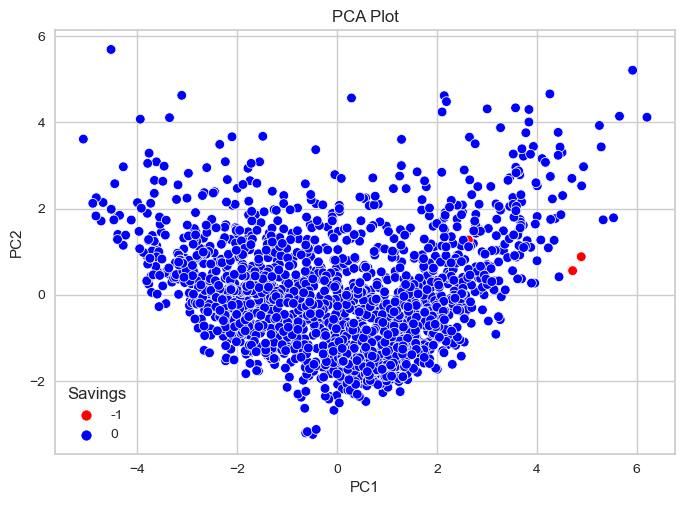

In [255]:
#visualizing PCA
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster, palette=["red", "blue"])  # Set colors for each dataset
    # Add labels and title
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title('PCA Plot')

# Assuming "PC1" and "PC2" are the names of the columns representing the first and second principal components
PCA_PLOT("PC1", "PC2", pca_df, "Savings")

### Supervised Machine learning Techniques

**Split Train and Test Sets.**

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
X = df_new.drop(columns=["TotalAcceptedCmp"])
y = df_new["TotalAcceptedCmp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
y.value_counts()

TotalAcceptedCmp
0    1494
1     310
2     120
3      34
4      21
5       6
Name: count, dtype: int64

In [258]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       302
           1       0.45      0.08      0.14        62
           2       0.15      0.10      0.12        20
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.76       397
   macro avg       0.23      0.19      0.19       397
weighted avg       0.68      0.76      0.69       397

Logistic Regression Accuracy: 0.760705289672544


In [259]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       302
           1       0.53      0.29      0.38        62
           2       0.38      0.15      0.21        20
           3       0.33      0.25      0.29         4
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00         2

    accuracy                           0.79       397
   macro avg       0.51      0.30      0.34       397
weighted avg       0.76      0.79      0.76       397

Random Forest Accuracy: 0.7934508816120907


In [260]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       302
           1       0.31      0.32      0.31        62
           2       0.20      0.25      0.22        20
           3       0.11      0.25      0.15         4
           4       0.20      0.14      0.17         7
           5       0.50      0.50      0.50         2

    accuracy                           0.70       397
   macro avg       0.36      0.38      0.37       397
weighted avg       0.72      0.70      0.71       397

Decision Tree Accuracy: 0.7002518891687658


In [261]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       302
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.76       397
   macro avg       0.13      0.17      0.14       397
weighted avg       0.58      0.76      0.66       397

SVM Accuracy: 0.760705289672544


In [262]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       302
           1       0.49      0.32      0.39        62
           2       0.38      0.30      0.33        20
           3       0.20      0.25      0.22         4
           4       0.25      0.14      0.18         7
           5       0.00      0.00      0.00         2

    accuracy                           0.80       397
   macro avg       0.36      0.33      0.34       397
weighted avg       0.76      0.80      0.78       397

XGBoost Accuracy: 0.7959697732997482


By Testing the model through Different classifier the Accuracy of XGBoost and RandomForest Accuracy is alsmost same.

### Model Evaluation:

## ROC CURVE

In [263]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predictions
y_pred = xgb.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       302
           1       0.49      0.32      0.39        62
           2       0.38      0.30      0.33        20
           3       0.20      0.25      0.22         4
           4       0.25      0.14      0.18         7
           5       0.00      0.00      0.00         2

    accuracy                           0.80       397
   macro avg       0.36      0.33      0.34       397
weighted avg       0.76      0.80      0.78       397

Confusion Matrix:
[[288  12   2   0   0   0]
 [ 31  20   6   3   2   0]
 [  8   5   6   0   1   0]
 [  3   0   0   1   0   0]
 [  1   3   1   1   1   0]
 [  0   1   1   0   0   0]]


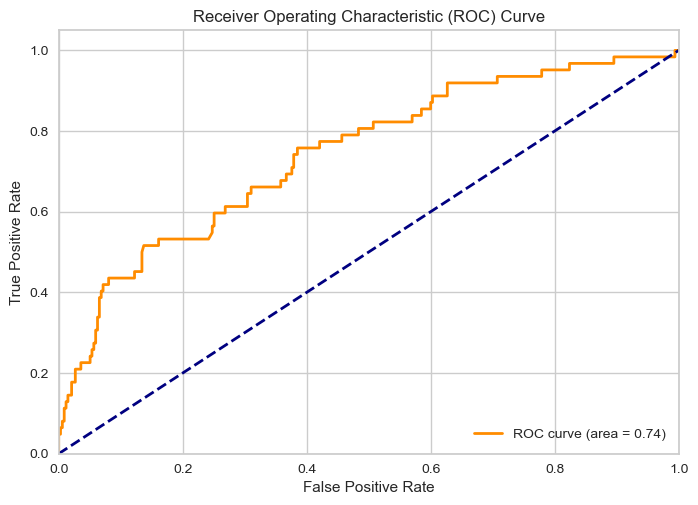

In [264]:
from sklearn.preprocessing import label_binarize

# Binarize the target variable
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])
y_probs = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary[:, 1], y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [265]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Model se predictions nikalna
y_pred = rf_pred
# Get predicted probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

# so you can use predict method to get predictions directly
# Binarize the target variable
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary[:, 1], y_probs)


# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [266]:
from sklearn.metrics import classification_report, confusion_matrix
# Get predictions
y_pred = rf_pred

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       302
           1       0.53      0.29      0.38        62
           2       0.38      0.15      0.21        20
           3       0.33      0.25      0.29         4
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00         2

    accuracy                           0.79       397
   macro avg       0.51      0.30      0.34       397
weighted avg       0.76      0.79      0.76       397

Confusion Matrix:
[[292   9   1   0   0   0]
 [ 42  18   1   1   0   0]
 [ 13   4   3   0   0   0]
 [  3   0   0   1   0   0]
 [  1   2   2   1   1   0]
 [  0   1   1   0   0   0]]


By comparing Classification Report, Confusion Matrix and ROC curve We can See that XGBoost Model has High Accuracy than Random Forest So, we are Selecting XGboost Model.

In [267]:
# Class-wise Metrics
from sklearn.metrics import precision_recall_fscore_support
class_metrics = precision_recall_fscore_support(y_test, y_pred, average=None)
num_classes = len(class_metrics[0])
labels = ['Class 0', 'Class 1', 'Class 2','Class 3']
for i, label in enumerate(labels):
    precision_class = class_metrics[0][i]
    recall_class = class_metrics[1][i]
    f1_score_class = class_metrics[2][i]
    print(f"Metrics for Class: {label}")
    print(f"Precision: {precision_class:.2f}")
    print(f"Recall: {recall_class:.2f}")
    print(f"F1-score: {f1_score_class:.2f}")
    print()

Metrics for Class: Class 0
Precision: 0.83
Recall: 0.97
F1-score: 0.89

Metrics for Class: Class 1
Precision: 0.53
Recall: 0.29
F1-score: 0.38

Metrics for Class: Class 2
Precision: 0.38
Recall: 0.15
F1-score: 0.21

Metrics for Class: Class 3
Precision: 0.33
Recall: 0.25
F1-score: 0.29



In [268]:
# ROC-AUC for Multiclass Classification (Optional):
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize

# Stratified KFold for balanced splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed

# Loop through folds for training and evaluation
for train_index, test_index in skf.split(X, y):
     X_train = X.iloc[train_index]
     X_test = X.iloc[test_index]
     y_train = y[train_index]
     y_test = y[test_index]

     xgb_model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', n_estimators=100, random_state=42)
     xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

     y_test_binary = label_binarize(y_test, classes=np.unique(y_train))

     roc_auc_micro = roc_auc_score(y_test_binary, xgb_model.predict_proba(X_test), average='micro')
     print("Micro-averaged ROC AUC Score:", roc_auc_micro)

     roc_auc_macro = roc_auc_score(y_test_binary, xgb_model.predict_proba(X_test), average='macro')
     print("Macro-averaged ROC AUC Score:", roc_auc_macro)

[0]	validation_0-mlogloss:1.33734
[1]	validation_0-mlogloss:1.12859
[2]	validation_0-mlogloss:1.00404
[3]	validation_0-mlogloss:0.91972
[4]	validation_0-mlogloss:0.85323
[5]	validation_0-mlogloss:0.81195
[6]	validation_0-mlogloss:0.77639
[7]	validation_0-mlogloss:0.75540
[8]	validation_0-mlogloss:0.72905
[9]	validation_0-mlogloss:0.72064
[10]	validation_0-mlogloss:0.71341
[11]	validation_0-mlogloss:0.70588
[12]	validation_0-mlogloss:0.70252
[13]	validation_0-mlogloss:0.69723
[14]	validation_0-mlogloss:0.69482
[15]	validation_0-mlogloss:0.69415
[16]	validation_0-mlogloss:0.69296
[17]	validation_0-mlogloss:0.69209
[18]	validation_0-mlogloss:0.69161
[19]	validation_0-mlogloss:0.69221
[20]	validation_0-mlogloss:0.69490
[21]	validation_0-mlogloss:0.69413
[22]	validation_0-mlogloss:0.69268
[23]	validation_0-mlogloss:0.69401
[24]	validation_0-mlogloss:0.69228
[25]	validation_0-mlogloss:0.69277
[26]	validation_0-mlogloss:0.69328
[27]	validation_0-mlogloss:0.69356
Micro-averaged ROC AUC Score: 

Gain Importance:
Higher Gain importance indicates that a feature leads to more significant separations between data points belonging to different classes, making it a more informative feature for classification.It reflects the feature's contribution to reducing model error during the tree building process.

Cover Importance:
Represents the number of times a feature is used to split the data across all trees in the XGBoost ensemble.It reflects the feature's overall participation in the tree ensemble, but it doesn't necessarily guarantee high predictive power.

In [269]:
# Feature Importance:
# Displaying feature importance
from xgboost import XGBClassifier
import pandas as pd

gain_importance = xgb_model.get_booster().get_score(importance_type='gain')
feature_names = X_train.columns

# Create a Series from the gain importance dictionary
gain_series = pd.Series(gain_importance, index=feature_names)

cover_importance = xgb_model.get_booster().get_score(importance_type='cover')
cover_series = pd.Series(cover_importance, index=feature_names)

# Combine Gain and Cover Series into a DataFrame
importance_df = pd.DataFrame({'Importance (Gain)': gain_series, 'Importance (Cover)': cover_series})

importance_df





Importance (Gain)  Importance (Cover)
Education                   0.651380           24.203661
Marital_Status              0.781960           39.853886
Income                      1.001735           48.718380
Recency                     0.814958           41.925694
NumWebVisitsMonth           1.038535           56.248013
Complain                         NaN                 NaN
Age                         0.762166           42.302540
TotalPurchases              0.830924           34.873009
Childrens                   0.852003           42.008663
Spending                    0.922822           68.752968
Clusters                    3.670628          161.473511
Savings                          NaN                 NaN

A feature with high Gain importance and high Cover importance suggests it's both informative and frequently used for splitting, likely a significant feature for the model.
A feature with high Cover importance but low Gain importance might be involved in many splits but doesn't necessarily contribute much to reducing model error. It might be a candidate for further investigation or feature engineering.

In [270]:
!pip install shap

The SHAP summary plot is a valuable tool for understanding how each feature contributes to individual predictions in your XGBoost model. It displays features along the y-axis and the range of SHAP values (feature effect on model prediction) along the x-axis. The color indicates the feature value (red for high, blue for low).

By analyzing this plot, you can identify features with consistently high positive or negative SHAP values, suggesting a strong influence on the model's predictions. Conversely, features with low or scattered SHAP values might have less impact.


In [271]:
# Model Interpretability:
import shap

# Create a SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for a set of test data samples
shap_values = explainer.shap_values(X_test)

# Feature names from training data
feature_names = X_train.columns

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

Model Optimization

RandomizedSearchCV for hyperparameter tuning of your XGBoost model:

In [272]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint

# Define your XGBoost model parameters to tune
param_dist = {
  'n_estimators': randint(100, 300),  # Integer distribution for number of trees
  'max_depth': randint(10, 30),  # Integer distribution for max depth
  # Add other XGBoost parameters with appropriate distributions here
  # (e.g., learning_rate: uniform(0.01, 0.1))
}

# Create an XGBoost classifier with initial parameters (you can adjust these)
xgb_model = XGBClassifier(objective='multi:softmax', n_jobs=-1)  # Multi-class classification, leverage all cores

# Perform RandomizedSearchCV with XGBoost model
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=3, n_iter=10)
random_search.fit(X_train, y_train)

# Retrieve the best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 21, 'n_estimators': 117}


The RandomizedSearchCV identified that a combination of a maximum tree depth of 17 and 258 trees resulted in the best performance based on the chosen evaluation metric (typically accuracy or AUC-ROC for classification).

### Cross Validation

In [273]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with XGBoost model
cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.77078086 0.76574307 0.76574307 0.77078086 0.78085642]
Mean CV accuracy: 0.7707808564231738


In [274]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [275]:
x = df_new.drop('Clusters', axis=1)
y = df_new['Clusters']

In [276]:
x

Education  Marital_Status   Income  Recency  NumWebVisitsMonth  \
0             0               1  58138.0       58                  7   
1             0               1  46344.0       38                  5   
2             0               0  71613.0       26                  4   
3             0               0  26646.0       26                  6   
4             1               0  58293.0       94                  5   
...         ...             ...      ...      ...                ...   
1980          0               0  34421.0       81                  7   
1981          1               0  64014.0       56                  7   
1982          0               1  56981.0       91                  6   
1983          1               0  69245.0        8                  3   
1984          1               0  52869.0       40                  7   

      Complain  Age  TotalAcceptedCmp  TotalPurchases  Childrens  Spending  \
0            0   67                 1              25          0      1617   
1            0   70                 0               6          2        27   
2            0   59                 0              21          0       776   
3            0   40                 0               8          1        53   
4            0   43                 0              19          1       422   
...        ...  ...               ...             ...        ...       ...   
1980         0   50                 0               4          1        30   
1981         0   78                 1              22          3       444   
1982         0   43                 1              19          0      1241   
1983         0   68                 0              23          1       843   
1984         0   70                 1              11          2       172   

      Savings  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1980        0  
1981        0  
1982        0  
1983        0  
1984        0  

[1985 rows x 12 columns]

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA # Import PCA

# Assuming pca_df is a PCA object
pca = PCA() # Create a PCA object
pca.fit(x_train)
final_model = make_pipeline(pca, XGBClassifier()) # Use pca as a transformer
final_model.fit(x_train, y_train)
#final_pipeline.score(x_test, y_test) # This line is redundant as final_model is already a pipeline
y_pred = final_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       121
           1       0.94      0.97      0.96       143
           2       0.98      0.91      0.94        66
           3       0.94      0.93      0.93        67

    accuracy                           0.94       397
   macro avg       0.95      0.94      0.94       397
weighted avg       0.94      0.94      0.94       397

[[113   4   0   4]
 [  3 139   1   0]
 [  1   5  60   0]
 [  5   0   0  62]]


In [279]:
final_model.score(x_test, y_test)

0.9420654911838791

In [280]:
import pickle
pickle_out = open('final_model.pkl','wb')
pickle.dump(final_model,pickle_out)
pickle_out.close()

In [142]:
# import pickle
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import pandas as pd

# # Sample training data -
# x_train = pd.DataFrame({
#     "Education": [0, 1, 2],
#     "Marital_Status": [1, 0, 1],
#     "Income": [58138, 46344, 71613],
#     "Recency": [58, 38, 26],
#     "NumWebVisitsMonth": [7, 5, 4],
#     "Complain": [0, 1, 0],
#     "Age": [67, 35, 61],
#     "TotalAcceptedCmp": [1, 0, 3],
#     "TotalPurchases": [25, 6, 21],
#     "Childrens": [0, 2, 1],
#     "Spending": [1617, 27, 776],
#     "Savings": [0, 1, 0]
# })

# columns = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'TotalAcceptedCmp', 'TotalPurchases', 'Childrens', 'Spending', 'Savings']
# x_cols = x_train[columns]

# # Fit and transform using the scaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x_cols)

# # Fit and transform using PCA
# pca = PCA(n_components=3)
# x_pca = pca.fit_transform(x_scaled)

# # Save the scaler and PCA objects to pickle files
# with open('scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)

# with open('pca.pkl', 'wb') as pca_file:
#     pickle.dump(pca, pca_file)

# # If you want to load the scaler and PCA objects from pickle files, do this:
# with open('scaler.pkl', 'rb') as scaler_file:
#     loaded_scaler = pickle.load(scaler_file)
    
# with open('pca.pkl', 'rb') as pca_file:
#     loaded_pca = pickle.load(pca_file)

In [143]:
# codes for streamlit app - 

In [144]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import pickle
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Load the model, scaler, and PCA objects
# with open(r'C:\Users\Admin\Desktop\marketing_segment_project_\final_model.pkl', 'rb') as model_file:
#     classifier = pickle.load(model_file)

# with open(r'C:\Users\Admin\Desktop\marketing_segment_project_\scaler.pkl', 'rb') as scaler_file:
#     scaler = pickle.load(scaler_file)

# with open(r'C:\Users\Admin\Desktop\marketing_segment_project_\pca.pkl', 'rb') as pca_file:
#     pca = pickle.load(pca_file)

# # Function to scale features, transform them with PCA, and predict using the classifier
# def predict_cluster(input_features):
#     # Convert input data into a numpy array
#     input_features = np.array(input_features).reshape(1, -1)
    
#     # Scale the features using the pre-fitted scaler
#     scaled_features = scaler.transform(input_features)

#     # Transform the features using the pre-fitted PCA
#     pca_features = pca.transform(scaled_features)

#     # Predict using the classifier
#     prediction = classifier.predict(pca_features)

#     return prediction

# # Main function for the Streamlit app
# def main():
#     st.title("Customer Segmentation App")

#     # Create input fields for each feature
#     education = st.selectbox("Education", [0, 1, 2])
#     marital_status = st.selectbox("Marital Status", [0, 1])
#     income = st.number_input("Income", min_value=0, max_value=1000000, step=1000)
#     recency = st.number_input("Recency", min_value=0, max_value=100, step=1)
#     num_web_visits_month = st.number_input("Number of Web Visits per Month", min_value=0, max_value=30, step=1)
#     complain = st.selectbox("Complain", [0, 1])
#     age = st.number_input("Age", min_value=0, max_value=150, step=1)
#     total_accepted_cmp = st.number_input("Total Accepted Campaigns", min_value=0, max_value=10, step=1)
#     total_purchases = st.number_input("Total Purchases", min_value=0, max_value=50, step=1)
#     children = st.number_input("Children", min_value=0, max_value=10, step=1)
#     spending = st.number_input("Spending", min_value=0, max_value=1000000, step=100)
#     savings = st.selectbox("Savings", [0, 1])

#     # When the user clicks the 'Predict' button, make a prediction
#     if st.button("Predict"):
#         input_features = [education, marital_status, income, recency, num_web_visits_month, complain, age, total_accepted_cmp, total_purchases, children, spending, savings]
#         prediction = predict_cluster(input_features)
#         st.write(f"The predicted cluster is: {prediction[0]}")

# if __name__ == '__main__':
#     main()

2024-06-06 11:37:06.278 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-06 11:37:06.281 Session state does not function when running a script without `streamlit run`
